# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

In [1]:
## Name:  Arjun Bhan

## UNI: AB5666

## The Dataset

### Description
This dataset contains details of individual relating to their health. The target is stored in **strokes** column which is binary variable indicating either 0 or 1. The goal of the assignment is a binary classification task to predict wether the person will get a stroke depending on other health factors

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn .metrics import roc_auc_score

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [4]:
## YOUR CODE HERE
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

**1.2: Show or Plot % of missing values in each column. Would you consider dropping any columns or assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

<Axes: xlabel='columns', ylabel='percentNull'>

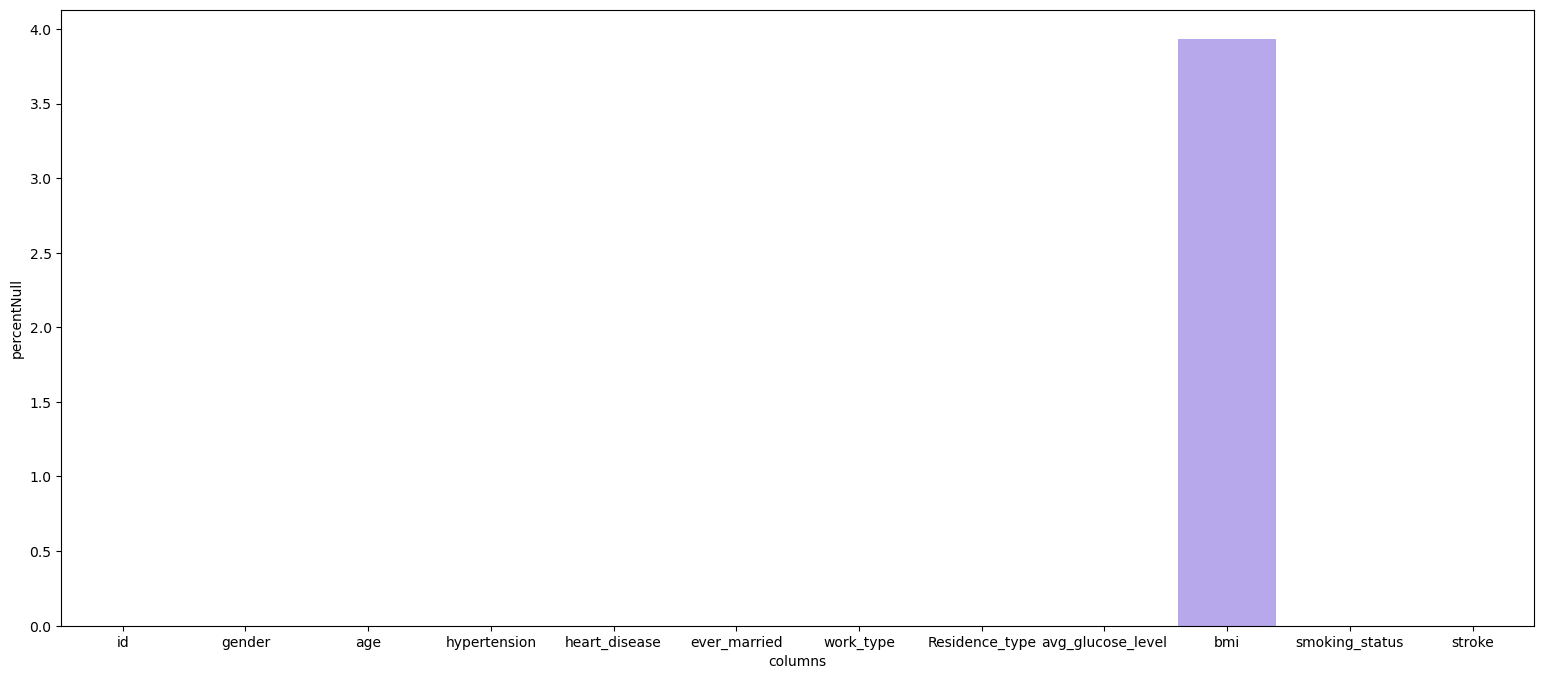

In [5]:
## YOUR CODE HERE

nullValues = df.isnull()
missingData = (nullValues.sum() / len(df)) * 100
plt.figure(figsize = (19,8))
missingValues = pd.DataFrame({
    'columns':df.columns,
    'percentNull':missingData
})

sns.barplot(x = missingValues['columns'], y = missingValues['percentNull'])


In [6]:
missingValues

,columns,percentNull
id,id,0.000000
gender,gender,0.000000
age,age,0.000000
hypertension,hypertension,0.000000
heart_disease,heart_disease,0.000000
ever_married,ever_married,0.000000
work_type,work_type,0.000000
Residence_type,Residence_type,0.000000
avg_glucose_level,avg_glucose_level,0.000000
bmi,bmi,3.933464


In [7]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

As null values can be harmful when implementing models I choose to replace them with a mean value. This way I could use the data with null fields without having to remove data.

**Check for the number of rows after handling null values, each column should have the same number of non-null count**

In [8]:
#Columns and rows before handling null values
df.shape

(5110, 12)

In [9]:
## YOUR CODE HERE
nullValues = df.isnull()
missingData = (nullValues.sum() / len(df)) * 100

pd.DataFrame({
    'coloumns':df.columns,
    'missing values':missingData
})

,coloumns,missing values
id,id,0.0
gender,gender,0.0
age,age,0.0
hypertension,hypertension,0.0
heart_disease,heart_disease,0.0
ever_married,ever_married,0.0
work_type,work_type,0.0
Residence_type,Residence_type,0.0
avg_glucose_level,avg_glucose_level,0.0
bmi,bmi,0.0


In [10]:
#Columns and rows after handling null values
df.shape

(5110, 12)

**1.3 Print the distribution of the target variable. Is the dataset balanced?**

In [11]:
## YOUR CODE HERE
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

**Your Comments Here**:
The data is not balanced as the distribution of the data is very heavy toward the 0 value. 

In [13]:
# **1.4: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

# **Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

# ![download.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0oAAAHqCAYAAAA6Wb4qAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzde1xVdb7/8TcgG3jI3hqI4iVSLqUoXqgJqgE8pGOKTieaSrOwDuUojnXMS5bpjFjqYESURpHUSbMbjceZHGmyXyV6RmsSU8cpU9TIIi+obExky+X3hw/WtBdeQJGF9Ho+Hj1m1lqf/V2ftdoPZr9nrfVdHnV1dXUCAAAAABg8rW4AAAAAAFobghIAAAAAmBCUAAAAAMCEoAQAAAAAJgQlAAAAADAhKAEAAACASTurG2jrysqOq7aWGdgBAACA1iYoyH7WbVxRAgAAAAATghIAAAAAmBCUAAAAAMDEsqD0wQcfaMyYMYqJiVFUVJSGDBmiP/7xj6qoqHCrW7dunW677TajZvny5WccLy8vT4mJierfv7+Sk5O1cePGBjXHjx/XnDlzFBMTo0GDBmnChAnav39/g7p9+/YpNTVVgwYNUmxsrObNm6fKysrmOXAAAAAArZ5HXV2dJTMN5Ofn69tvv1W/fv3UoUMH7dy5U4sXL1a/fv30yiuvSJK2bNmie+65R7feeqt+/etfq6ioSM8//7zmzJmjMWPGGGPl5eUpKytLU6ZMUWRkpPLz87V27Vrl5+erd+/eRt1vf/tb7dixQzNnzpS/v7+ee+45OZ1Ovffee/Lz85MkOZ1OjRw5Ut26dVNaWpqOHDmiBQsW6MYbb1RWVlaTj5PJHAAAAIDW6VyTOVgWlM7k7bff1pw5c1RYWKguXbrogQceUHl5ufLz842a2bNn6+OPP1ZhYaE8PT3lcrl044036s4779SMGTMkSTU1NRo1apQiIiKUnZ0tSdq6davuvPNO5ebmKiEhQZL0/fffa+jQoXr88cc1duxYSVJubq5eeOEFffTRRwoICJAkvffee5o2bZpWr16tiIiIJh0TQQkAAABonc4VlFrV9OBXXHGFJOnUqVNyuVzatGmTpk6d6lYzcuRIvfPOO9qxY4eioqJUVFSkiooKJSUlGTVeXl4aPny4XnnlFdXV1cnDw0Pr1q2T3W5XXFycUdetWzdFR0ersLDQCEqFhYWKjY01QpIkDRs2TI8//rgKCwubHJQAAACAC1FZ+aOOHz+mmppqq1u57Hh5tZO/f0f5+bW/4DEsD0o1NTWqrq7Wrl27tGTJEiUmJqpHjx7avXu3Tp06pbCwMLf6+qCyZ88eRUVFqbi4WJIa1IWHh+vEiRM6cOCAgoODVVxcrNDQUHl6ejao27Bhg7FcXFys22+/3a3GZrMpJCREe/bsabbjBgAAAM6msvJHVVQcVceOQfL2tsnDw8Pqli4bdXV1OnXKpWPHDknSBYcly4NSTEyMMYFDXFycMjMzJUnl5eWSJIfD4VZfv1y/3el0ymazydfX162uQ4cOkqRjx44pODhYTqdTdnvDS2sOh8MYq3488z7PVNdYgYH+Tf4MAAAAft6+/voHBQZ2lo+P7/mL0YC3t5+8vDrL6TyikJDgCxrD8qC0fPlyVVZWateuXcrJydGECRP06quvWt1Ws+EZJQAAADRVVVWVPD29VV1da3Urly1PT29VVVXp0KGKs9a06meU+vTpI0mKjo5W3759dfvtt2vt2rUKDw+XdPoKz0/VL9dfMXI4HHK5XKqqqpKPj49RV3/1p2PHjkZdaWlpg/07nU5jrPo68z7r60JDQy/4OAEAAICm4Ha7i3Ox569VvXC2T58+8vT0VElJiUJCQuTt7d3guaDdu3dLkhFa6p9Nqn9WqV5xcbHat2+vLl26GHV79+6VeZK/3bt3uwWgsLCwBmO5XC6VlJQQlAAAAICfiVYVlLZs2aLa2lr16NFDNptNsbGxKigocKtZvXq1goKC1LdvX0mnr0TZ7XatWbPGqKmpqVFBQYHi4uKMJJmQkCCn06n169cbdaWlpSoqKlJ8fLyxLj4+Xps2bdLRo0eNdWvXrpXL5TKmFQcAAADQtll2611qaqpiY2MVEREhHx8fffnll8rLy9M111yjIUOGSJImTZqke+65R0888YRGjRqloqIi5efna86cOcbsdTabTRMnTlRWVpYCAgKMF86WlJQYE0NI0oABAzR48GDNmjXLeOFsdna2unbtquTkZKNu9OjRev3115WWlqa0tDSVlZVp4cKFGjFihHE7IAAAAGC1r7/+Ss8++7R27dqpyspKxcUlaP36ddqw4fNm20de3kt69dWXm3XMy4VlQSkqKkp/+ctftH//fklSjx49NHr0aN1///2y2WySpEGDBumFF17QM888o1WrVqlz58567LHHNGbMGLexUlNTJZ2eGOLw4cOKiIhQbm6uevfu7VaXmZmpjIwMzZ07Vy6XSzExMcrOzpafn59R43A49Nprr+nJJ5/U5MmT5ePjo6SkJE2fPv1Sng4AAACg0WprazVnzuOqq6vVpEn/LT8/P3355b/cah59dIq2bClSQcFH8vLyMtZ/991+3XXXf8rf3641a/6f2+tzSkq+0d133657771fv/3tpBY7ntbIo8780A6aVWNmvbM7fOXr491CHTXOyapTqnCetLoNAACAn6UffvhGwcFXnXX7wYMHlJycpIcemqo77zx9EcF89WfFiteUk/O88vJe1zXX/PsCQkHBai1cOE81NTX6n/95U+HhEca21av/rIUL52nRomzdcMNNqq6uVk1NjdukaZeT853HVj3rHSRfH2/dPWOF1W24eSNjrCpEUAIAAGiN6p+n9/c/+zs7+/cfKEnatu0Lt6C0bdtWDRwYrX379mrbti/cgtK2bV/I09NTUVEDJEnt2rVTu3atOzJUVla63SHWXFrVZA4AAAAAzu2pp/6g1NR7JEnz58/VL395nX73u/EN6nr3jpTN5qNt275wW799+1ZFRQ1QVFT/M24LDQ03Alhe3kv65S+vc6v5zW9G6ZFHJmvr1i/04IMpSky8UXfccasKCla71a1Z855++cvrtGXLZj3//DMaOXKIhgz5pR57bJrbxGn1Pvtsk373u/EaOjROQ4fG6ZFHJmvXrp0Njj0x8UaVln6vRx+dol/9KkHTpz/cyDPXNAQlAAAA4DJy663JeuCBCZKkX//6Ns2ena5x4/6rQZ23t7f69InU9u1bjXVOZ7m++Wav+vcfqH793IPS0aNH9e23Jerff8B5eygt/U6zZz+q666L0aRJ/y273a758+dqz57iBrXPPZep3bt36f77H9R//udv9Pe/r1dWVoZbzQcfvK+pUyfLZrPpt7+dpPvvH6/vv/9OaWkP6ptv9rnV1tbWasqU36l9e3+lpT2kW24Zcd5+L0Trvo4GAAAAwE2/fv3Vrl07LV36ovr1669hw04HhW3btjao7d9/oLZu3aLvvtuv7t17aNu2rfLw8FDfvv3Uvr2/Fi9+Vj/88IOCg4ON0FR/y965fPttiRYvztXAgdGSpMTEobr99iStWfOefve7/3ardTg66tlnlxiv7amrq9W7776t48ePy9/fX5WVlcrKytDw4SP1+OO/Nz43cuStuvvu2/Xqqy/rD394ylhfXV2tm276pSZPfqSJZ65puKIEAAAAtFH1V4fqQ9C2bV8oNDRc7dv765prervdmlf/nwMGDDrvuFdeGWKEJEm64oordOWVV+n7779rUDty5K+NkHS6p0GqqanRDz+USpL+8Y9PVVHh1NCht+jYsWPGP7W1tRowYKC2bGk4Nfltt93R2FNwwbiiBAAAALRR/foNkKenp7Zt26rhw0cazydJpydq6NMnUtu2faFf/eoWbd++VV27dlNQUOfzjtulS3CDdXa7XRUVzvPW2u2nZ5qrr/32228kSVOmnHk68p9OX16/HBzc9bw9XiyCEs6otvrUOadLtEq1q0pHy11WtwEAAHBZsNvt6tUrVNu3fyGXy6WdO790uxrTr19/bdr0f6qqOqmvv/5KN988tFHjenp6nXH9md48dL7a+lfpzJr1B3XqFHTefbfUTHwEJZyRZztvbc54wOo2Grh2xlJJBCUAAIDGiooaqD//+U/69NO/y+VyuT2DFBU1QG++uVyffrpJ1dXV6t///LfdNbfu3XtIkjp27Khf/CKmxfd/NjyjBAAAALRh/fsPVF1dnd54Y5k6d+6i4OB/3woXFdVftbW1evPNZUZtS4uJiZW/v13Llr2qU6dONdh+pqnEWwJXlAAAAIA2rD78bN++rcGtdR06dFRIyFXavn2bOnTooJ49e7V4f+3b+2v69MeUnj5b998/VkOG/EoBAYE6cOAHffrpRvXqFapZs/7Q4n0RlAAAAIA2LDg4WJ07d9HBgweMiRx+KipqgEpKvlG/fv3dZqdrSTff/Ct16hSkZcte1VtvrZDL5VKnTp0UFTVAt96abElPHnVneuIKzaas7LjxgNrZBAXZdfeMFS3UUeO8kTG21T6jdOhQhdVtAAAAXFI//PCNgoOvsrqNy975zuO5Ji/jGSUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABM2lndAAAAAIDmY3f4ytfHu8X3e7LqlCqcJy/os99+W6KsrEXavv0L+fj46Oabf6WJEx+Sr69vM3fZeAQlAAAAoA3x9fHW3TNWtPh+38gYqwo1PShVVFTooYcmKDg4WPPm/VFHjx7R4sVZOnbsqObOXXAJOm0cghIAAAAAy/z5z39SRYVTr776hjp27ChJ8vJqp/T0JzRu3AMKDQ2zpC+eUQIAAABgmU2b/q5rr/2FEZIkafDgRNlsNm3a9HfL+iIoAQAAALDMvn171bNnqNs6m82mbt16qKRknzVNiaAEAAAAwEIVFU75+9sbrLfb7XI6nRZ0dBpBCQAAAABMCEoAAAAALGO3O3T8eEWD9RUVFXI4HBZ0dBpBCQAAAIBlevbspW++2eu2zuVy6fvv9yskpKc1TYmgBAAAAMBCsbE3avPmf6i8/JixrrDwY7lcLt1ww02W9UVQAgAAAGCZW2+9Xf7+ds2cOVWffrpR77//Vz377CLdfPNQ9eoVev4BLhFeOAsAAAC0ISerTumNjLGW7PdC2O12ZWfn6Nlnn9asWdPl4+Ojm2/+ldLSHm7mDpuGoAQAAAC0IRXOk6rQSavbaJKQkKv0zDPPW92GG269AwAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJgQlAAAAADAhKAEAAACACUEJAAAAAEwsC0oFBQVKS0tTQkKCBg4cqFGjRumNN95QbW2tUTNz5kxdc801Df55//33G4yXl5enxMRE9e/fX8nJydq4cWODmuPHj2vOnDmKiYnRoEGDNGHCBO3fv79B3b59+5SamqpBgwYpNjZW8+bNU2VlZfOeAAAAAACtlmUvnH311VfVrVs3zZgxQ4GBgfr000/11FNP6dtvv9Wjjz5q1F155ZV6+umn3T7bs2dPt+W8vDxlZWVpypQpioyMVH5+vsaPH6/8/Hz17t3bqJs6dap27Nih2bNny9/fX88995zuu+8+vffee/Lz85MkOZ1OpaSkqFu3bsrOztaRI0e0YMECHTlyRFlZWZfuhAAAAABoNSwLSi+++KICAgKM5djYWJ04cUIrVqzQlClTZLPZJEm+vr4aOHDgWcdxuVzKyclRSkqKUlNTJUnXX3+9Ro0apZycHGVnZ0uStm7dqk8++US5ublKSEiQJF199dUaOnSoVq5cqbFjx0qS3nrrLTmdTq1atcroz8vLS9OmTVNaWpoiIiKa/2QAAAAAP1P793+rN99crh07/qm9e4sVEnKVli9/x+q2rAtKPw1J9fr06aOqqiodO3ZMnTt3btQ4RUVFqqioUFJSkrHOy8tLw4cP1yuvvKK6ujp5eHho3bp1stvtiouLM+q6deum6OhoFRYWGkGpsLBQsbGxbv0NGzZMjz/+uAoLCwlKAAAAaNWu6GBTO5tPi++32lWlo+WuJn9u795ibdz4f4qM7Ku6ulq3R3GsZFlQOpPNmzerY8eOCgwMNNaVlJTouuuuU2VlpSIiIjR+/HiNGDHC2F5cXCxJCgsLcxsrPDxcJ06c0IEDBxQcHKzi4mKFhobK09OzQd2GDRvcxrv99tvdamw2m0JCQrRnz55mO1YAAADgUmhn89HmjAdafL/XzlgqqelB6aab4hUXN1iS9NRTf9BXX/2reRu7QK0mKG3fvl0rV67UpEmT5OXlJen0FaaoqCiFh4eroqJC7777rqZMmaKTJ08qOTlZ0ulnimw2m3x9fd3G69ChgyTp2LFjCg4OltPplN1ub7Bfh8Oh8vJyY9npdMrhcJy3rrECA/2b/BmcW1BQw3+PAAAAbcnBg55q1+7ym6D6wnr+92c8PDzk4eHRbMfu6el5wb8dW0VQOnTokB566CFFRUXpwQcfNNaPGzfOrW7IkCFKSUnR888/bwSl1q6s7Lhqa+vOWcMP/6Y5dKjC6hYAAAAuqdraWlVXt45b0JriYnuuq6tTXV1dsx17bW3tOX87nut3uOUxtaKiQg8++KB8fX2Vk5Mjb2/vc9bfcsst+v7773XkyBFJp6/0uFwuVVVVudXVX/3p2LGjUVdR0fAkOZ1O4+pTfZ3T6TxvHQAAAIC2y9KgVFVVpYkTJ6qsrExLly7VFVdc0eQx6p9Nqn9WqV5xcbHat2+vLl26GHV79+5VXZ371Z3du3crNDTUbTzzWC6XSyUlJW51AAAAANouy4JSdXW1Hn74Ye3cuVMvv/yyunfvft7P1NXVqaCgQN27dzdmpYuOjpbdbteaNWuMupqaGhUUFCguLk4eHh6SpISEBDmdTq1fv96oKy0tVVFRkeLj44118fHx2rRpk44ePWqsW7t2rVwulzGtOAAAAIC2zbJnlNLT0/Xxxx9r+vTpOnnypL744gtjW3h4uMrLyzVz5kwlJSXpqquuktPpVH5+vj777DNlZGQYtTabTRMnTlRWVpYCAgKMF86WlJQoMzPTqBswYIAGDx6sWbNmaebMmfL391d2dra6du3q9rzT6NGj9frrrystLU1paWkqKyvTwoULNWLECIWHh7fMyQEAAABgKcuCUv2U3IsWLWqwbdmyZbrmmmvk7++vnJwclZWVydvbW5GRkcrJyVFiYqJbff2LZpcvX67Dhw8rIiJCubm56t27t1tdZmamMjIyNHfuXLlcLsXExCg7O1t+fn5GjcPh0GuvvaYnn3xSkydPlo+Pj5KSkjR9+vTmPgUAAAAAWinLgtJHH3103pqcnJxGj5eammoEprPx9/dXenq60tPTz1nXq1cv5eXlNXrfAAAAAC7MyZMntXHj6YsoP/xQqh9//FEff/yhJKlPn74KDu5qSV+tYnpwAAAAAD9PR48e0ezZM93W1S8//vjvNWLEKCvaIigBAAAAbUm1q0rXzlhqyX4vRNeu3bRhw+fN3M3FIygBAAAAbcjRcpckl9VtXPYsf+EsAAAAALQ2BCUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAQCtUV1dndQuXtYs9fwQlAAAAoJXx8mqnU6eYue5inDrlkpfXhU/yTVACAAAAWhl//446duyQXK4qriw1UV1dnVyuKh07dkj+/h0veBzeowQAAAC0Mn5+7SVJ5eWHVVNTbXE3lx8vr3ay268wzuOFICgBAAAArZCfX/uL+qGPi8OtdwAAAABgQlACAAAAABOCEgAAAACYEJQAAAAAwISgBAAAAAAmBCUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCkndUNAPj5sDt85evjbXUbbk5WnVKF86TVbQAAgFaGoASgxfj6eOvuGSusbsPNGxljVSGCEgAAcMetdwAAAABgQlACAAAAABOCEgAAAACYEJQAAAAAwISgBAAAAAAmBCUAAAAAMCEoAQAAAIAJQQkAAAAATHjhLICftdrqUwoKslvdhptqV5WOlrusbgMAgJ81y4JSQUGB3nvvPe3YsUPl5eW68sorNWbMGI0ePVqenv++0LVu3To9++yz2r17t7p06aJx48bp3nvvbTBeXl6eVqxYocOHDys8PFzTp0/XDTfc4FZz/PhxZWRk6G9/+5tcLpdiYmL0xBNPqEePHm51+/bt07x581RUVCQfHx8lJSVp2rRp8vPzuzQnA4BlPNt5a3PGA1a34ebaGUslEZQAALCSZbfevfrqq7LZbJoxY4ZefPFFDRkyRE899ZQWLVpk1GzZskVpaWnq06ePXn75ZSUnJ2v+/Pl688033cbKy8tTVlaWxo4dq5deekk9e/bU+PHj9dVXX7nVTZ06VR999JFmz56trKwsHTx4UPfdd58qKyuNGqfTqZSUFP3444/Kzs7WzJkztXr1aj3++OOX9oQAAAAAaDUsu6L04osvKiAgwFiOjY3ViRMntGLFCk2ZMkU2m01LlixRZGSk5s+fb9SUlpZqyZIluuuuu+Tp6SmXy6WcnBylpKQoNTVVknT99ddr1KhRysnJUXZ2tiRp69at+uSTT5Sbm6uEhARJ0tVXX62hQ4dq5cqVGjt2rCTprbfektPp1KpVq4z+vLy8NG3aNKWlpSkiIqLFzhEAAAAAa1h2RemnIalenz59VFVVpWPHjsnlcmnTpk0aMWKEW83IkSN16NAh7dixQ5JUVFSkiooKJSUlGTVeXl4aPny4CgsLVVdXJ+n0LXx2u11xcXFGXbdu3RQdHa3CwkJjXWFhoWJjY936GzZsmGw2m1sdAAAAgLarVc16t3nzZnXs2FGBgYEqKSnRqVOnFBYW5lZTf0Vnz549kqTi4mJJalAXHh6uEydO6MCBA0ZdaGio2/NP9XX1Y9XXhYeHu9XYbDaFhIS41QEAAABou1pNUNq+fbtWrlypcePGycvLS+Xl5ZIkh8PhVle/XL/d6XTKZrPJ19fXra5Dhw6SpGPHjhl1dnvDma0cDocxVn2deZ9nqgMAAADQdrWK6cEPHTqkhx56SFFRUXrwwQetbqdZBQb6W91Cm9PapnIGLgW+5wAAWMvyoFRRUaEHH3xQvr6+ysnJkbe3t6R/XxFyOp1u9fXL9dsdDodcLpeqqqrk4+Nj1NVf/enYsaNRV1pa2mD/TqfTGKu+zrzP+rrQ0NAmH19Z2XHV1tads4YfRE1z6FCF1S3gAvFdbzy+5wAAXHrn+m1i6a13VVVVmjhxosrKyrR06VJdccUVxraQkBB5e3s3eC5o9+7dkmSElvpnk+qfVapXXFys9u3bq0uXLkbd3r17jckdfjreTwNQWFhYg7FcLpdKSkouKCgBAAAAuPxYFpSqq6v18MMPa+fOnXr55ZfVvXt3t+02m02xsbEqKChwW7969WoFBQWpb9++kqTo6GjZ7XatWbPGqKmpqVFBQYHi4uLk4eEhSUpISJDT6dT69euNutLSUhUVFSk+Pt5YFx8fr02bNuno0aPGurVr18rlchnTigMAAABo2yy79S49PV0ff/yxpk+frpMnT+qLL74wtoWHh8vf31+TJk3SPffcoyeeeEKjRo1SUVGR8vPzNWfOHGP2OpvNpokTJyorK0sBAQGKjIxUfn6+SkpKlJmZaYw5YMAADR48WLNmzdLMmTPl7++v7Oxsde3aVcnJyUbd6NGj9frrrystLU1paWkqKyvTwoULNWLEiAaz4QEAAABomywLShs2bJAkLVq0qMG2ZcuWKSYmRoMGDdILL7ygZ555RqtWrVLnzp312GOPacyYMW719S+aXb58uQ4fPqyIiAjl5uaqd+/ebnWZmZnKyMjQ3Llz5XK5FBMTo+zsbPn5+Rk1DodDr732mp588klNnjxZPj4+SkpK0vTp05v7FAAAAABopSwLSh999FGj6hISEhp1y1tqaqoRmM7G399f6enpSk9PP2ddr169lJeX16j+AAAAALQ9reY9SgAAAADQWhCUAAAAAMCEoAQAAAAAJgQlAAAAADAhKAEAAACACUEJAAAAAEwISgAAAABgQlACAAAAABOCEgAAAACYEJQAAAAAwISgBAAAAAAmBCUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAACTJgWlxYsX6+uvvz7r9l27dmnx4sUX3RQAAAAAWKnJQWnnzp1n3b5r1y4tWbLkopsCAAAAACs16613P/74o9q1a9ecQwIAAABAiztvqvnqq6/01VdfGcuff/65ampqGtSVl5frzTffVGhoaPN2CAAAAAAt7LxB6cMPPzSeO/Lw8NDbb7+tt99++4y1HTp0UEZGRvN2CAAAAAAt7LxB6c4779TgwYNVV1enO+64Qw899JDi4+Pdajw8POTn56eQkBBuvQMAAABw2TtvquncubM6d+4sSVq2bJnCwsIUGBh4yRsDAAAAAKs06fLP9ddff6n6AAAAAIBWo8n3ya1fv17vvvuuvv32WzmdTtXV1blt9/Dw0IcffthsDQIAAABAS2tSUFq6dKkyMzMVGBio/v3765prrrlUfQEAAACAZZoUlJYtW6bY2Fjl5ubK29v7UvUEAAAAAJZq0gtnnU6nhg0bRkgCAAAA0KY1KSj1799fe/fuvVS9AAAAAECr0KSg9Pvf/15r167VX/7yl0vVDwAAAABYrknPKE2ePFkul0uPPvqofv/736tz587y8vJyq/Hw8NBf//rXZm0SAAAAAFpSk4JSYGCgAgMD1atXr0vVDwAAAABYrklBafny5ZeqDwAAAABoNZr0jBIAAAAA/Bw06YrSP/7xj0bV/eIXv7igZgAAAACgNWhSULr33nvl4eFx3rovv/zyghsCAAAAAKs1KSgtW3JJLk4AACAASURBVLaswbqamhp99913euedd1RbW6upU6c2erxvvvlGeXl52rp1q3bt2qXQ0FCtXr3arWbmzJn63//93wafzc7O1i233OK2Li8vTytWrNDhw4cVHh6u6dOn64YbbnCrOX78uDIyMvS3v/1NLpdLMTExeuKJJ9SjRw+3un379mnevHkqKiqSj4+PkpKSNG3aNPn5+TX6+AAAAABcnpoUlK6//vqzbktOTtbdd9+tzz77rEE4OZtdu3Zp3bp1GjBggGpra1VXV3fGuiuvvFJPP/2027qePXu6Lefl5SkrK0tTpkxRZGSk8vPzNX78eOXn56t3795G3dSpU7Vjxw7Nnj1b/v7+eu6553TffffpvffeM0KQ0+lUSkqKunXrpuzsbB05ckQLFizQkSNHlJWV1ahjAwAAAHD5alJQOhdPT08lJSXppZde0sMPP9yozyQmJmrIkCGSTl85+uc//3nGOl9fXw0cOPCs47hcLuXk5CglJUWpqamSToe6UaNGKScnR9nZ2ZKkrVu36pNPPlFubq4SEhIkSVdffbWGDh2qlStXauzYsZKkt956S06nU6tWrVJAQIAkycvLS9OmTVNaWpoiIiIadXwAAAAALk/NOutdeXm5KioqGr9zz+bZfVFRkSoqKpSUlGSs8/Ly0vDhw1VYWGhcqVq3bp3sdrvi4uKMum7duik6OlqFhYXGusLCQsXGxhohSZKGDRsmm83mVgcAAACgbWrSFaXvv//+jOudTqc+//xz5eXl6brrrmuWxn6qpKRE1113nSorKxUREaHx48drxIgRxvbi4mJJUlhYmNvnwsPDdeLECR04cEDBwcEqLi5WaGhog4AWHh6uDRs2uI13++23u9XYbDaFhIRoz549zX14AAAAAFqZJgWlxMTEs856V1dXp4EDB2ru3LnN0li9Pn36KCoqSuHh4aqoqNC7776rKVOm6OTJk0pOTpZ0OqjZbDb5+vq6fbZDhw6SpGPHjik4OFhOp1N2u73BPhwOh8rLy41lp9Mph8Nx3rrGCAz0b1I9zi8oqOG/Q6Ct4XsOAIC1mhSU5s+f3yAoeXh4yOFwKCQkROHh4c3anCSNGzfObXnIkCFKSUnR888/bwSl1qys7Lhqa888SUU9fhA1zaFDjb+9E60L3/XG43sOAMCld67fJk0KSq0lmNxyyy2aO3eujhw5ooCAADkcDrlcLlVVVcnHx8eoq7/607FjR0mnrwiVlpY2GM/pdBpXn+rrnE7nGetCQ0Ob+3AAAAAAtDIXNJtCTU2Ntm3bpoKCAhUUFGjbtm2qra1t7t4arf7ZpPpnleoVFxerffv26tKli1G3d+/eBtOQ79692y0AhYWFNRjL5XKppKSEoAQAAAD8DDQ5KK1Zs0aDBw/WXXfdpSlTpmjKlCm66667lJCQoDVr1lyKHt3U1dWpoKBA3bt3N2ali46Olt1ud9t/TU2NCgoKFBcXZ9wumJCQIKfTqfXr1xt1paWlKioqUnx8vLEuPj5emzZt0tGjR411a9eulcvlMqYVBwAAANB2NenWuw8//FBTp05VaGioJkyYYFxd2bNnj958801NmzZNPj4+uvnmmxs1XmVlpdatWydJ+u6773T8+HG9//77kqSoqChJp9+vlJSUpKuuukpOp1P5+fn67LPPlJGRYYxjs9k0ceJEZWVlKSAgwHjhbElJiTIzM426AQMGaPDgwZo1a5Zmzpwpf39/ZWdnq2vXrm63FY4ePVqvv/660tLSlJaWprKyMi1cuFAjRoy4JM9hAQAAAGhdmhSUXnzxRfXt21crVqxwexbohhtu0B133KExY8YoJyen0UGprKyswctp65cXLFigxMRE+fv7KycnR2VlZfL29lZkZKRycnKUmJjo9rn6F80uX75chw8fVkREhHJzc9W7d2+3uszMTGVkZGju3LlyuVyKiYlRdna2/Pz8jBqHw6HXXntNTz75pCZPniwfHx8lJSVp+vTpjT9ZAAAAAC5bTQpKu3bt0tSpU91CUj2bzaZbb73V7QrO+fTo0UM7d+48Z01OTk6jx0tNTTUC09n4+/srPT1d6enp56zr1auX8vLyGr1vAAAAAG1Hk55R8vX1dXtux+zIkSMN3mUEAAAAAJebJgWlG264QcuWLdPnn3/eYNvmzZu1fPly3Xjjjc3WHAAAAABYoUm33k2fPl2ff/657r33XkVGRqpXr16SpL179+pf//qXOnXqpGnTpl2SRgEAAACgpTTpilL37t31l7/8RSkpKfrxxx/1wQcf6IMPPtCPP/6o++67T3/+85/VvXv3S9UrAAAAALSIJl1ROnHihE6ePKnHHntMjz32WIPt33//vSorK91mkAMAAACAy02TrigtWLBAaWlpZ90+adIk/fGPf7zopgAAAADASk0KSv/3f/+nIUOGnHX7kCFDtGHDhotuCgAAAACs1KSgdOjQIXXp0uWs24OCgnTw4MGLbgoAAAAArNSkoBQQEKDdu3efdfvu3bvlcDguuikAAAAAsFKTglJCQoLefvttbd++vcG2bdu26e2331Z8fHyzNQcAAAAAVmjSrHeTJ0/WunXrNHr0aMXHxysiIkKS9PXXX2v9+vUKDAzUww8/fEkaBQAAAICW0qSgFBQUpD/96U96+umn9eGHH+rjjz+WJPn7++vXv/61HnnkEQUFBV2SRgEAAACgpTQpKElSp06dtHDhQtXV1enIkSOSTj+75OHh0ezNAQAAAIAVmhyU6nl4eCgwMLA5ewEAAACAVqFJkzkAAAAAwM8BQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABM2lndAAAAwMWyO3zl6+NtdRtuTladUoXzpNVtALhABCUAAHDZ8/Xx1t0zVljdhps3MsaqQgQl4HLFrXcAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJsx6BwAAcAnUVp9SUJDd6jYaqHZV6Wi5y+o2gFaPoAQAAHAJeLbz1uaMB6xuo4FrZyyVRFACzodb7wAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJpYGpW+++UZz5szRrbfeqsjISI0cOfKMdevWrdNtt92mqKgoDRkyRMuXLz9jXV5enhITE9W/f38lJydr48aNDWqOHz+uOXPmKCYmRoMGDdKECRO0f//+BnX79u1TamqqBg0apNjYWM2bN0+VlZUXd8AAAAAALguWBqVdu3Zp3bp1uuqqqxQWFnbGmi1btigtLU19+vTRyy+/rOTkZM2fP19vvvmmW11eXp6ysrI0duxYvfTSS+rZs6fGjx+vr776yq1u6tSp+uijjzR79mxlZWXp4MGDuu+++9xCkNPpVEpKin788UdlZ2dr5syZWr16tR5//PHmPwkAAAAAWp12Vu48MTFRQ4YMkSTNnDlT//znPxvULFmyRJGRkZo/f74kKTY2VqWlpVqyZInuuusueXp6yuVyKScnRykpKUpNTZUkXX/99Ro1apRycnKUnZ0tSdq6das++eQT5ebmKiEhQZJ09dVXa+jQoVq5cqXGjh0rSXrrrbfkdDq1atUqBQQESJK8vLw0bdo0paWlKSIi4tKeGAAAAACWsvSKkqfnuXfvcrm0adMmjRgxwm39yJEjdejQIe3YsUOSVFRUpIqKCiUlJRk1Xl5eGj58uAoLC1VXVyfp9C18drtdcXFxRl23bt0UHR2twsJCY11hYaFiY2ONkCRJw4YNk81mc6sDAAAA0Da16skcSkpKdOrUqQa35dVf0dmzZ48kqbi4WJIa1IWHh+vEiRM6cOCAURcaGtogoIWHhxtj1deFh4e71dhsNoWEhLjVAQAAAGibLL317nzKy8slSQ6Hw219/XL9dqfTKZvNJl9fX7e6Dh06SJKOHTum4OBgOZ1O2e32BvtxOBzGWPXjmfd5pjoAQNNd0cGmdjYfq9tooNpVpaPlLqvbAAC0Eq06KLUFgYH+VrfQ5gQFNQy7QFvT1r/nmzMesLqFBq6dsVRBQa0vwAGXQlv/GwM0h1YdlOqvCDmdTrf19cv12x0Oh1wul6qqquTj8+//kau/+tOxY0ejrrS0tMF+nE6nMVZ9nXmf9XWhoaFNOoaysuOqra07Zw1/rJrm0KEKq1vABeK73njN9T23O3zl6+PdLGP9HPD35fLF35em4bsOnHauvx2tOiiFhITI29tbe/bsUXx8vLF+9+7dkmSElvpnk4qLixUZGWnUFRcXq3379urSpYtR9/e//111dXXy8PBwG++nASgsLMx47qmey+VSSUmJkpOTm/koAeDS8fXx1t0zVljdhps3MsZa3QIAAOfVqidzsNlsio2NVUFBgdv61atXKygoSH379pUkRUdHy263a82aNUZNTU2NCgoKFBcXZ4SihIQEOZ1OrV+/3qgrLS1VUVGRWxCLj4/Xpk2bdPToUWPd2rVr5XK5jGnFAQAAALRdll5Rqqys1Lp16yRJ3333nY4fP673339fkhQVFaXu3btr0qRJuueee/TEE09o1KhRKioqUn5+vubMmWPMXmez2TRx4kRlZWUpICBAkZGRys/PV0lJiTIzM439DRgwQIMHD9asWbM0c+ZM+fv7Kzs7W127dnW7UjR69Gi9/vrrSktLU1pamsrKyrRw4UKNGDGiwWx4AAAAANoeS4NSWVmZHn74Ybd19csLFixQcnKyBg0apBdeeEHPPPOMVq1apc6dO+uxxx7TmDFj3D5X/6LZ5cuX6/Dhw4qIiFBubq569+7tVpeZmamMjAzNnTtXLpdLMTExys7Olp+fn1HjcDj02muv6cknn9TkyZPl4+OjpKQkTZ8+/VKcBgAAAACtjKVBqUePHtq5c+d56xISEhp1y1tqaqoRmM7G399f6enpSk9PP2ddr169lJeXd959AgAAAGh7WvUzSgAAAABgBYISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJgQlAAAAADAhKAEAAACACUEJAAAAAEwISgAAAABgQlACAAAAABOCEgAAAACYEJQAAAAAwISgBAAAAAAmBCUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAk3ZWNwAAAACgcewOX/n6eFvdhpuTVadU4TxpdRvNjqCEn6XW+EdGart/aAAAQPPw9fHW3TNWWN2GmzcyxqpCbe/3C0EJP0ut8Y+MJL0+/04FBdmtbsNNtatKR8tdVrcBAABaqdrqU63u94t08b9hCEpAK+LZzlubMx6wug03185YKomgBAAAzqw1/n6RLv43DJM5AAAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJq0+KK1cuVLXXHNNg3/S09Pd6tatW6fbbrtNUVFRGjJkiJYvX37G8fLy8pSYmKj+/fsrOTlZGzdubFBz/PhxzZkzRzExMRo0aJAmTJig/fv3X5LjAwAAAND6tLO6gcZaunSp7Ha7sdypUyfjv2/ZskVpaWm69dZb9eijj6qoqEjz589Xu3btNGbMGKMuLy9PWVlZmjJliiIjI5Wfn6/x48crPz9fvXv3NuqmTp2qHTt2aPbs2fL399dzzz2n++67T++99578/Pxa5oABAAAAWOayCUp9+/ZVQEDAGbctWbJEkZGRmj9/viQpNjZWpaWlWrJkie666y55enrK5XIpJydHKSkpSk1NlSRdf/31GjVqlHJycpSdnS1J2rp1qz755BPl5uYqISFBknT11Vdr6NChWrlypcaOHdsCRwsAAADASq3+1rvzcblc2rRpk0aMGOG2fuTIkTp06JB27NghSSoqKlJFRYWSkpKMGi8vLw0fPlyFhYWqq6uTdPoWPrvdrri4OKOuW7duio6OVmFhYQscEQAAAACrXTZBadSoUerTp48SExO1ePFiVVdXS5JKSkp06tQphYWFudVHRERIkvbs2SNJKi4ulqQGdeHh4Tpx4oQOHDhg1IWGhsrT07NBXf1YAAAAANq2Vn/rXVBQkCZPnqz+/fvLy8tLhYWFeuGFF7R//34tXLhQ5eXlkiSHw+H2ufrl+u1Op1M2m02+vr5udR06dJAkHTt2TMHBwXI6nW7PQv10vPqxmiIw0L/Jn8G5BQU1/PeDS4tz3vI459bgvOPngu86fi4u5rve6oNSXFyc221wN910k+x2u55//nmlpaVZ2FnjlJUdV21t3Tlr+GPVNIcOVVz0GJzzpmmOcy5x3puCc26N5jrvaHl815uG7/rli+9605zvu36u83nZ3Hr3U8OHD5ck7dixw7gi5HQ63Wrql+u3OxwOuVwuVVVVudXVXyXq2LGjUVdR0fCEOp1OYywAAAAAbdtlGZR+KiQkRN7e3g2eH9q9e7ckKTQ0VNK/n02qf1apXnFxsdq3b68uXboYdXv37jUmd/jpePVjAQAAAGjbLsug9Ne//lUeHh7q16+fbDabYmNjVVBQ4FazevVqBQUFqW/fvpKk6Oho2e12rVmzxqipqalRQUGB4uLi5OHhIUlKSEiQ0+nU+vXrjbrS0lIVFRUpPj6+BY4OAAAAgNVa/TNKqampiomJ0dVXXy0PDw+tX79eb7zxhn7zm9/oyiuvlCRNmjRJ99xzj5544gmNGjVKRUVFys/P15w5c4zZ62w2myZOnKisrCwFBAQYL5wtKSlRZmamsb8BAwZo8ODBmjVrlmbOnCl/f39lZ2era9euSk5OtuQcAAAAAGhZrT4ohYaG6k9/+pMOHDig6upq9ezZU9OmTdO4ceOMmkGDBumFF17QM888o1WrVqlz58567LHHNGbMGLex6l80u3z5ch0+fFgRERHKzc1V79693eoyMzOVkZGhuXPnyuVyKSYmRtnZ2fLz87v0BwwAAADAcq0+KM2aNUuzZs06b11CQoISEhLOW5eammoEprPx9/dXenq60tPTG90nAAAAgLbjsnxGCQAAAAAuJYISAAAAAJgQlAAAAADAhKAEAAAAACatfjIHAAAAoLGu6GBTO5uP1W24qXZV6Wi5y+o20EQEJQAAADSZ3eErXx9vq9s4o80ZD1jdgptrZyyVRFC63BCUAAAA0GS+Pt66e8YKq9to4I2MsVa3gDaCZ5QAAAAAwISgBAAAAAAmBCUAAAAAMCEoAQAAAIAJQQkAAAAATAhKAAAAAGBCUAIAAAAAE4ISAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJu2sbgAAgLbG7vCVr4+31W24qTnlkpe3zeo23FS7qnS03GV1GwBwRgQlAACama+Pt+6escLqNty8kTFWmzMesLoNN9fOWCqJoASgdeLWOwAAAAAwISgBAAAAgAlBCQAAAABMCEoAAAAAYEJQAgAAAAATghIAAAAAmBCUAAAAAMCEoAQAAAAAJgQlAAAAADAhKAEAAACACUEJAAAAAEwISgAAAABgQlACAAAAABOCEgAAAACYEJQAAAAAwISgBAAAAAAmBKWz2Ldvn1JTUzVo0CDFxsZq3rx5qqystLotAAAAAC2gndUNtEZOp1MpKSnq1q2bsrOzdeTIES1YsEBHjhxRVlaW1e0BAAAAuMQISmfw1ltvyel0atWqVQoICJAkeXl5adq0aUpLS1NERITFHQIAAAC4lLj17gwKCwsVGxtrhCRJGjZsmGw2mwoLCy3sDAAAAEBLICidQXFxscLDw93W2Ww2hYSEaM+ePRZ1BQAAAKClcOvdGTidTjkcjgbrHQ6HysvLmzSWp6dHo+o6XdG+SeO2BJsj0OoWzqix5/R8WuM5l1rneW+ucy61zvPOOW95rfGcS5x3K3DOrcH/lrY8vuvWuJjz7lFXV1fXjL20CX379tXDDz+s8ePHu60fM2aMAgMDtXjxYos6AwAAANASuPXuDBwOh5xOZ4P1TqdTHTp0sKAjAAAAAC2JoHQGYWFhKi4udlvncrlUUlKi0NBQi7oCAAAA0FIISmcQHx+vTZs26ejRo8a6tWvXyuVyKSEhwcLOAAAAALQEnlE6A6fTqZEjR6p79+5KS0tTWVmZFi5cqBtuuIEXzgIAAAA/AwSls9i7d6+efPJJbd68WT4+PkpKStL06dPl5+dndWsAAAAALjGCEgAAAACY8IwSAAAAAJgQlAAAAADAhKAEAAAAACYEJQAAAAAwISgBAAAAgEk7qxtA63D8+HG9/vrr2rZtm0pLS/X0008rLCxMb731lqKiotS3b1+rW2yTOO8tz+Vyac2aNfr8889VXl6uDh066LrrrtOIESNks9msbq9N2rt3r3Jzc7V582a3c/7ggw+qV69eVrfXJvXp00dvv/22+vfv32DbP//5T91xxx368ssvLegMwOWuqKhI5eXl+o//+A9J0pEjR/TUU09p9+7duummm/TII4+oXbu2ETHaxlHgouzevVvjxo1TbW2tBg4cqK+++konT56UJO3Zs0f/+Mc/lJmZaXGXbQ/nveUdPnxY999/v3bt2qXu3burU6dO+te//qV3331XeXl5+p//+R8FBgZa3Wabsn37dqWkpMjX11eDBw9Wp06ddPjwYX3yyScqKCjQ8uXL1a9fP6vbbHPO9eaP6upqeXl5tWA3bdu6dev0yiuv6ODBgwoLC9N//dd/KTo62q1m69atGj16NOH0EtmyZYvef/99/fDDD6qqqnLb5uHhoZycHIs6a5syMjIUHx9vBKWnnnpKGzZs0ODBg/XOO+/I19dXDz30kMVdNg+CEjR//nyFhobqpZdeks1mc/vRMmjQIC1atMjC7touznvLW7hwocrLy/XOO++4/T/t27Zt0+TJk7Vw4ULOezNbtGiRIiMjtXTpUrcXdldWVuqBBx7QokWL9Nprr1nYYdtx6NAhHTx40Fjes2dPg0BUVVWl/Px8devWraXba5M2btyoCRMmqE+fPoqOjtaWLVt0zz33KDU1VVOnTrW6vZ+FFStWaN68ebriiit01VVXydv7/7d351FRlf8fwN/DIi7IToKCqcgiqxqCIAoqSiBgYpqYKCN9E1ncdyyzUnInkMAUIZQMFSSWBANXzA3JJk1TiQTBhUUWUUCG+f3hYX6OM6jpMFfufF7neA5znwvz5nrPZT73ee7zKDMdifWKi4sRFBQE4Om1PDc3F2vXrsUHH3yAffv2IT4+ngolwh6FhYWIiIhA9+7dwefzRdra7v4S6aPjLnunTp3CypUrxYYjWVtbY+HChQgPD2coGXvxeDxs3bpVpEgCgG7dumH27NlYsmQJQ8nYJzk5Gdu3bweHwwGHw8HKlSvF9hEIBFBUVMSaNWsYSMg+0dHR8PDwEPb+CwQCJCYmYvPmzSgvL8eGDRtYMwTpbZWQkAAfHx98+eWXdKxlpKmpCSoqKgCefpZ58uQJxowZAwAwNjbGvXv3mIwnVXRGEXTp0gUtLS0S2yoqKtCzZ08ZJ5IPdNxlr7GxERoaGhLbNDQ0xIZskDenrKyMR48eSWx7/PgxfbCRokmTJsHOzg4CgQCzZs3C559/joEDB4rso6ysjH79+kFTU5OhlOxy/fp1zJ07V/iaw+Fg1qxZGDRoEIKDg/G///0P27dvZzAh+1VWVsLLy4uuJTJkaGiIU6dOwd7eHhkZGbC0tISamhqAp/8fbPr8QrPeEdjZ2SEuLg7Nzc3CbRwOBwKBAMnJyXBwcGAwHXvRcZc9CwsLJCYmivXg8fl8JCYm0uQZHcDR0RHbtm1DUVGRyPaioiJ8++23GDFiBEPJ2KdPnz6ws7ODvb09EhMT4e3tDTs7O5F/Q4YMoSJJihQVFSXe8LKzs8OePXtw48YN+Pn5oaqqioF08sHe3p6e/ZIxLpeLXbt2Yfjw4fj5558xc+ZMYdv58+dhamrKYDrp4ghe9MQnkQvFxcWYNm0aevbsibFjxyIxMRE+Pj64fv06SktLceDAARgaGjIdk3XouMteQUEBuFwudHR0MHbsWOjq6qKyshJ5eXmorKzE7t27YWtry3RMVrlz5w4+/vhj3L17FwMHDhQe8xs3bkBfXx9JSUnQ09NjOiarPX78WGJvaXu9q+TV+fn5wdzcXOIwRwAoKSlBQEAAqqur8ejRI/pA3wGuXbuGJUuWYPr06XBychL2bDyLznXpKygoAI/Hg7m5OYYPHy7cHhUVBWtrazg7OzOYTnqoUCIAgLKyMkRFReH06dN48OAB1NXV4ejoiHnz5tGH9Q5Ex132Ll++jNjYWFy8eBF1dXVQV1fHe++9h8DAQOpR6iANDQ1ISUkRO+Y+Pj7o0aMH0/FYqb6+Hhs3bkROTg7q6+sl7kMf2t/czp078f333+Po0aPtDjeqrKxEQEAArl+/Tse8A5iZmQm/5nA4Eveh405eFxVKhDCkoaHhhR8SS0pK0LdvXxkmIoSwxaJFi3Ds2DFMmTIFAwcOlDgT2KRJkxhIxi6tra1obGxE165doaDQ/tMMTU1NqKysRJ8+fWSYTj6kpqa2WyC1oXNdumgdJUJIhwsMDERcXJzERU6LiorA5XJx8uRJBpIRQjq706dPY+XKlZg6dSrTUVhNQUEB3bt3BwCkpaXB2dlZ4jNgjx8/xoULF6hQ6gA+Pj5MR5A7tI4SkSuBgYHttikoKKBnz54YNGgQJk6cSA8BS1FlZSVCQ0MRHR0tcufl77//TnbdlwAAIABJREFUBpfLhbm5OYPp2CsjIwM5OTntLkyYnp7OUDJ2GjJkSLt3e9uuL2ZmZvD394e9vb2M07GXsrIy9PX1mY4hV1auXInk5GSJfydv376NlStX4oMPPmAgGSHSResoEbnS0NCA4uJiVFZWwtDQENra2qiqqkJpaSl0dXWho6OD7OxsfP/990hMTBSbbpa8nvj4eEyfPh1Lly7F1q1bweFwcOXKFcyePRtDhgxBZGQk0xFZJzIyEt999x3MzMxgZGQksTePSBeXy8WhQ4fw5MkTODs7C68vJ06cgLKyMlxdXXHhwgVwuVxs375duBYHeTO+vr44dOgQRo4cyXQUufGiJxlqa2vpeTwp8vLywpYtW2BiYgIvL68X7ks3wKSP1lEicmXWrFnYtGkTdu3aJfJQ5NWrV7FgwQLMmTMHQ4YMQUBAADZv3ozY2FgG07KHnp4e4uPj8fHHH2P16tX48MMP8emnn8Le3h7btm2j1cU7QGpqKj755BNa5FSGlJWV0b9/f8TGxooUps3NzZgzZw569uyJQ4cOYe7cuYiJiaFCSUq6du2KS5cuYerUqXB0dIS6urpIO4fDgb+/PzPhWOTEiRM4deqU8PXu3buho6Mjsk9TUxN+++03DBo0SNbxWMvS0lK4iLWFhcVLn1Ei0iVP6yjRZA4Enp6emDt3LiZMmCDWlpGRgejoaGRnZyMtLQ3r1q3DhQsXGEjJXtevX4efnx8aGhowbtw4bNmy5YUPBZPXN3ToUERHR9MaVTI0atQofPXVVxKnij127Bg+++wz5OfnIzc3F0uWLMGlS5cYSMk+z970koTD4dBMYFLwww8/4IcffgDwdCp8bW1tsZ5qZWVlGBkZYdGiRTQig7BCamoqVq1aBQ0NDdTW1mLTpk3w9PQEAHz55Ze4desW4uLiGE4pHdSjRFBSUiJ8GPV53bt3R3l5OQCgd+/eEtfiIK8uPj5e4nZHR0ecOXMGFhYWwj+6dMdX+saOHYvz589ToSRDdXV1qKmpkdhWW1uLhoYGAICqqirdFZaia9euMR1BLsyaNQuzZs0CAIwZM0Y4tJcQNvPx8UHfvn0lrqOkqanJmjWUACqUCICBAwdi586dsLe3FymYGhoasHPnThgbGwMA7t+/LzakgPw3GzZseGH75s2bhV9ToSR9Pj4+WLNmDZqbm9tdmJDWUpIuBwcHbN68GX369BFZzPfChQvYsmWLsGgtLi6GgYEBUzEJeWNHjx5lOoLcam5uxsmTJ1FcXCzxhm5ISAgDqdjN1tZW4gLtoaGhDKTpODT0juDixYv45JNPoKSkBHt7e2hpaaG6uhpnz54Fn89HXFwchg4dii1btqClpQXLly9nOjIhr+X5O73P9mAIBAIajtQB7t27h7lz5+Lq1avo2bMnNDU18eDBA9TX12PQoEGIiYlBr169sH//fqioqGDixIlMR2aNhw8fYu/eveDxeLhz5w42b94MIyMj/PTTT7CysqKbAlKWm5uL2tpaTJ48GQBQWlqKpUuXCteWWbduHVRVVRlOyT53796Fr68v7t27B4FAACUlJTx58gQA0KVLFygpKaGwsJDhlOxUW1uLW7duSSxOhw0bxkAi6aNCiQAAKioqEB8fj8uXL6OiogK6urqwsrKCv78/dHV1mY5HiFScP3/+pfvY2dnJIIn8OXHiBP7880+R6wubhme8bW7evIlZs2ahtbUVgwcPxvHjx3Hw4EFYWFhg/fr1qKqqwpYtW5iOySo+Pj7w8vICl8sFAMyZMwc3b97ExIkTcfDgQYwfPx6rV69mOCX7zJs3D9XV1YiKioKDgwNSUlLQp08fpKenY8+ePYiNjYWRkRHTMVmlqakJy5cvx5EjR9qd7ZEtNx1p6B0BAOjq6mLZsmVMx5ArV65ceek+dMdXepqampCeno4PP/wQgwcPZjqO3HF2dqbCSIbWr1+PAQMGYMeOHejSpQssLS2FbUOGDMGmTZsYTMdOJSUlMDU1BQDU19fj9OnTiIiIgKurK/r27YvIyEgqlDrA77//js8//1w4syOfz4eGhgZmzpyJxsZGfPXVV0hISGA2JMtERESAx+MhKioKwcHBCA8PR48ePZCeno5r167hq6++Yjqi1FChRAhDJk+e/NKH19lyR+ZtoKKigqysrJeuuUHeXE1NDdTU1KCgoNDuRA7P0tDQkEEq+VJYWIiIiAh0794dfD5fpE1HRweVlZUMJWMvPp8vvKa3zQ47YsQIAECfPn3omHeQhw8fQkNDQ7iA9bPH2crKCjExMQymY6e8vDwEBwfDxcUFwNNn3a2srDB+/Hh89tlnSE9PZ82kSVQoEQBPh8UkJyfj33//lTjWNC8vj4FU7JaYmCi2rba2FqdOncLp06fx2WefMZCK3WxtbfH777/D3t6e6Sis5uDggOTkZFhbW2P48OF0Q4ABXbp0QUtLi8S2iooKVq1z8rYYOHAg0tPTYWNjg/3792PIkCHCtX7u378PTU1NhhOyk6GhISoqKgA8/T9IS0sTrsd25MgRuhHTAe7du4d3330XioqKUFFRQV1dnbDt/fffx6JFixhMJ11UKBHk5eUhNDQUY8eOxT///IPx48ejubkZZ8+eha6uLg2X6SDtPQszbtw4bN68GTk5OcK7NUQ6QkNDsWjRIigoKGDMmDHQ1tYW+xBPf1Tf3Pr162FoaCj8mqb9lj07OzvExcVh1KhRUFRUBPB08hKBQIDk5GTW3O19mwQFBSE0NBRpaWlQVFQUWZz95MmTMDc3ZzAde7m4uODMmTPw8PBAYGAggoODMXz4cCgpKaGqqgpLly5lOiLr6OrqCosjAwMDnDt3Tth7+s8//7Dqmk+TORB8+OGHcHBwwIIFC2BhYYGUlBRYWFigsrISXC4XM2fOxJQpU5iOKVfOnDmD0NBQFBQUMB2FVZ6d9a69Czn1bhA2KC4uxrRp09CzZ0+MHTsWiYmJ8PHxwfXr11FaWooDBw4Ii1kiPaWlpfjrr79gamqKfv36CbcnJyfD1NSUno+UgT///BO5ublobGyEo6Mj3eztAGFhYVBTU8Py5cuRkJCADRs2YOzYsejSpQt+/fVXTJw4EV9//TXTMaWCCiWCoUOHIjo6GsOHDxcueNo2reMvv/yCb7/9Fjk5OQynlC9RUVE4cOAATp48yXQUVklNTX3pna5JkybJKI18mDlzJtasWSNx1qni4mKsWbNG4jBU8ubKysoQFRWF06dP48GDB1BXV4ejoyPmzZtHRRJhhebmZsTFxcHFxQWDBg1iOo7cqKqqQk1NjfC6npCQgOzsbDQ1NcHR0RHBwcEi63J2ZjT0jqBr165obW0Fh8OBrq4ubt26JSyUunXrhvv37zOckJ0k3W1pbm5GUVERCgsL8emnnzKQit18fHyYjiB3zp8/j4aGBoltDx8+pF7TDtSnTx988803TMeQG0eOHHnpPuPHj5dBEvnRpUsXxMbGSlz4lHQcbW1taGtrC1/7+/vD39+fuUAdiAolgkGDBuGff/7BiBEj4ODggNjYWGhpaUFZWRnbtm2DiYkJ0xFZSdIq7ioqKtDX18eXX34pXLSQSF95eTn++usvlJeXw9PTE1paWrh37x7U1dXRtWtXpuPJjYsXL0JLS4vpGIRIxbx58yRuf7YXm4b2Sp+FhQX+/vtv1ixw2pnU19fj77//RkVFBd555x2YmJiwbqIYGnpHcPLkSZSVlQlXtg4MDBRezPX09BAdHU3r+RBWaG5uxrp165CSkoKWlhZwOBzhIpxBQUEwMjLC4sWLmY7Z6e3YsQM7duwAADx+/Bhdu3YVG/LY3NwMPp+P6dOn0wyPUhIYGIgVK1agX79+CAwMfOG+HA6Hpk2WsrKyMrFtbTOZHjp0CBs2bICNjQ0DydjtypUrWLhwIRYsWIDRo0cLZxokHYfP5+Pbb7/Fnj170NjYKFx0tlu3bpgxYwYWLFggnESms6MeJYJRo0YJv+7VqxdSU1Nx69YtNDY2YsCAAejSpQuD6QiRnq1btyI7OxsbN27E8OHD4ejoKGxzcXFBUlISFUpSMGTIEMyePRsCgQDR0dGYMGEC9PT0RPZRVlaGkZERRo8ezVBK9mloaBCumdTecEfScfr06SNxm7m5OTgcDnbs2IHvvvuOgWTsNmPGDDx58kR47X7+xgyHw8HFixeZisdKGzduRFJSEgICAuDm5gZtbW1UVVUhOzsbu3fvRnNzM1auXMl0TKmgQknONTU1wdvbG6tWrRLODMPhcERm6yEdp7y8HLm5ubh79y6am5vF2mkVd+nKzMzEokWL4OHhIbYIp6GhocQ7wuS/s7Ozg52dHVpbW3H37l2EhISIFUpE+vbs2SPxa8I8Wvi048yePZtV01F3BmlpaQgNDcWcOXOE23r16gVzc3N069YNCQkJVCgRdlBRUUFtbS2UlOhUkLUjR45g0aJFEAgEwmfCnsXhcKhQkrK6urp2Z/tqGwpGpKe1tRVpaWkYP348FUpEruXk5NDzeB0kNDSU6Qhyp7W1FZaWlhLbrKys0NraKuNEHYc+HRO8//77yMrKEi4WRmQjIiICTk5O+Oabb2iRUxkZMGAATp06JTLkrs25c+dgamrKQCr2UlJSgp6eHp48ecJ0FLmzZ88e3Lt3D0uWLBFr27x5M/T19fHxxx8zkIy9JD0X9uTJExQXF+POnTtYsWIFA6nYj5YgkL33338fmZmZEj83ZmVlsWp2RyqUCAYPHoytW7fik08+wejRo6GjoyPWjc2mk/5tUV5ejtWrV1ORJENcLherVq2CsrIy3N3dAQB37txBYWEhkpKSsGnTJoYTso+fnx/i4uLg5OREMwrK0I8//ggulyuxrV+/foiPj6dCScokPRemoqKCESNGwN3dXeINGvLmaAkC2XvvvfcQEREBPz8/uLq6Cp9Rys3NRWlpKRYsWCAyXX5n/gxJhRIR3uW6f/8+8vPzxdo5HA5NadoBLC0tcfv2baZjyJWJEyeitrYW3377LXbu3AkACAkJQffu3bFo0aJOfTF/W5WWluL27dtwcXGBvb29xBsxNMRU+srLy/Huu+9KbKPn8ToGPRf29qElCDpG2+fGu3fv4sKFC+22A53/MyQVSgR5eXlMR5BLX3zxBRYtWoRevXrB0dFR7Bkl0jFmzpyJyZMn49KlS6iuroa6ujqGDh0KVVVVpqOx0rFjx6CsrAxlZWX8+eefYu30LF7HUFVVRWlpKezt7cXaSkpKqHePdGrPLkHA4XAwa9asFy5BQKRLnj430jpKhDBkyJAhaGlpQUtLCxQUFKCioiLSTlOaSsegQYOQnJwMa2trrFy5EkFBQe1O6EAIWyxbtgwFBQVISkqCvr6+cPvdu3cxffp02NraYuPGjQwmZIevv/76P+1PNwWk4/z58zh//rxwCYIPP/zwhUsQsGVNn7dBc3Mz4uLi4OLigkGDBjEdp8NRj5KcqqmpgZqaGhQUFFBTU/PS/ek5GumjKU1lQ1lZWTiZwKFDh+Dr60uFEmG9xYsX46OPPsL777+P4cOH45133sH9+/dx9uxZaGtr03phUnL06FGR1/X19aivr4eSkhI0NDRQU1ODlpYW9OzZE2pqalQoSUnbEgTA05uKU6ZMQa9evV7pey9cuAALCwt07969IyOyVpcuXRAbGwtbW1umo8gE9SjJqWfvspuZmb30A3tnHl/KFnRxfz3e3t7o3bs3xo8fj1WrViE4OPiFhdIHH3wgw3TyoaysDLGxseDxeLhz5w4SExNhZmaG6OhoDB06FA4ODkxHZKWamhrEx8fj7NmzqKmpgYaGBhwcHODv7083vzpAQUEBli1bhpUrV2Ls2LFQUFBAa2srcnNz8c0332DDhg0YNmwY0zHlGp/Ph6WlJQ4ePAgLCwum43Ra06dPh4eHB2bMmMF0lA5HhZKcOnToEFxcXKCpqYnU1NSXFkqTJk2SUTIiCV3cX9/p06exfPlyVFZWgsPh4EWXvM7+0Onb6OLFi5g9ezYMDAzg4OCApKQk4Xm8bds23LhxA9999x3TMQl5Yz4+PvD19cWUKVPE2vbv3499+/bh0KFDDCQjbfh8PiwsLJCSkkJ/S9/AlStXsHDhQixYsACjR49Gt27dmI7UYWjonZx6tvDx8fFhMAl5VXRP4/WMGDEC+fn5qKurg52dHeLi4mBubs50LLmxceNGODs7IzIyEi0tLdi7d6+wzdLSEmlpaQymI0R6bt68iXfeeUdiW69evVBUVCTjRIR0jBkzZuDJkyfCIbxdu3YVueHOpmesqVAihMgFNTU1hIeHw9zcHJqamkzHkRtXr15FaGgoAIj1XGtoaKC6upqJWKzX3NyM3bt3IycnB3fv3kVTU5NIO5s+yLwtDA0N8eOPP2LkyJFQUFAQbm9tbUVSUhI9G0lYQ56esaZCiQAAcnNzcfjw4Xb/oB44cIChZIRIDw0hlb0ePXqgtrZWYltZWRmtcdJBwsPDsX//fri4uGDUqFG0/IAMLF26FCEhIRg3bhzGjh0rXIQzLy8P9+7dw/bt25mOSIhUtN38kgdUKBFERUUhOjoaxsbG6NevH/1BJaxFd9llb9SoUYiJiYGDgwPU1dUBPD3Ojx8/RmJiIlxcXJgNyFJHjhzBwoUL8cknnzAdRW64uLggJSUFO3bsQF5eHioqKqCrqwsbGxt8+umnMDMzYzoiIVLV2NiI4uJilJeXw87ODj179mQ6ktRRoUSQnJyMwMBALFiwgOkohHQoussue0uWLMG0adPg5uYGe3t7cDgcbNu2DUVFRVBSUsL8+fOZjshKLS0t9CweA0xNTbF169ZX2pdmMiWd2ffff4+dO3eivr4eHA5HOEkPl8uFnZ0d5s6dy3REqaBCiYDP50tcvZ0QtqG77LKnq6uLtLQ0JCQk4PTp0+jbty9qa2vh7e0NLpcr7GUi0uXt7Y3c3Fw4OjoyHYVIwOfzMXPmTJrJVMY4HA6GDRuGHj16MB2lU4uNjUVMTAyCg4Ph4OAgMtOjq6sr0tLSqFAi7OHt7Y0jR47QWiZvMbq4SwfdZWdGz549ERoaKlfj2plmbW2NiIgILFiwACNGjJBYkI4fP56BZKQNzWQqXYWFhcK12rhcLvT09MDj8WBgYCB8FlJBQQF79uxhOGnnl5ycjHnz5iEgIAB8Pl+krW/fvigpKWEomfRRoUSwdOlSrFmzBnPmzMGIESOgpqYmtg8twtlx6OIuO3SXXfbWrl0LLy8vDB06lOkocmXp0qUAnk6YkZ2dLdZOa4YRtqivr8fChQuRn58PVVVVNDQ0wNvbG3p6evjhhx+gqamJ1atXMx2TVSorK9u96aioqIjGxkYZJ+o4VCgR/Pnnnzh+/Diqqqpw4sQJsXYOh0OFUgegi7vs0V122Ttx4gR++ukn6Ovrw9PTExMmTICpqSnTsVgvLy+P6QiEyER4eDiKioqwf/9+mJubw9LSUtjm5OSEXbt2MZiOnQwMDHDp0iWJI5F+//13DBgwgIFUHYMKJYLPP/8cvXr1wrZt22jWOxmii7vs0V122Tt69CgKCwuRlZWF1NRU7Ny5E0ZGRvDy8sKECRNgYGDAdERW6tOnD9MRCJGJvLw8hIWFwdraWmwYWO/evVFeXs5QMvb66KOPEBERAS0tLbi5uQF4OrT96NGjiI+PF/6tZQMqlAhKSkqwfft22NnZMR1FrtDFXfboLjszhg4diqFDhyIsLAxnzpxBZmYmdu3ahYiICNjY2OCnn35iOiKrVVVViU2FDzy9zhDS2TU1NbW7iHhDQ4PI4r9EOvz9/XHnzh2sXbsWa9euBQD4+voCAGbMmIGPPvqIyXhSRYUSgbm5Oe7fv890DLlDF3fZo7vszFJQUMCIESNgb28PZ2dnrF+/Hn/88QfTsViJz+dj69atOHDgAOrr6yXuQ72nhA3MzMyQnZ2NkSNHirUdP34c1tbWDKRiv5UrV2LGjBk4c+YMqquroa6uDgcHB/Tr14/paFJFhRLBmjVrsGzZMujq6sLBwYGG3skIXdxlo6amBmpqalBQUEBNTc1L99fQ0JBBKvl09uxZZGVl4ciRI6irq4OFhQVmz57NdCxWiouLw8GDBxESEoL169dj4cKFUFZWRmZmJurq6mjdPIbRTKbSExQUhMDAQDQ2NsLd3R0cDgc8Hg8ZGRlITU1FXFwc0xFZ58mTJ1BWVoahoSEMDQ2ZjtOhOAKan1LuDRkyBC0tLWhpaYGCggJUVFRE2jkcDi5evMhQOvY6efIkAgMD4e7uDnd3d4SGhuLzzz/HrVu3sHfvXsTFxdH6VlIwaNAgJCcnw9raGmZmZuBwOC/cn+6ySxePx0NmZiYOHz6MiooK9O/fHxMmTICXlxfeffddpuOxloeHBz7++GNMmzYNFhYWOHjwoPA5yJCQEBgYGGDFihUMp2SnV5nJlEhXbm4uwsPDUVZWJtymr6+PVatWYdy4cQwmYyc7Ozu4ubnB09OT9Z9TqFAiiIqKeumHx5CQEBmlkS90ce94hw4dgouLCzQ1NZGamvrSc33SpEkySiYfzMzM0KtXL3h4eMDLy4vWsZIRGxsb7Nq1C8OGDYOVlRW+//574QxVJ06cwKpVq3D69GmGU7KLpJlM2xaUXbx4Mc1kKgP//vuvcBiYkZER03FYKzIyEllZWbh16xbeeecdTJgwAR4eHrCysmI6mtTR0DvynxeBvHDhAiwsLNC9e/cOSiQ/XF1d4erqShf3DvRs4ePj4/OfvpfO9Te3Z88e2NravrRAbUPHXDq0tLTQ0NAA4OnNl8uXLwsLpaqqKjQ3NzMZj5VoJlPZiY+Pf+k+J0+eBPB0VIy/v38HJ5Iv8+bNw7x583D58mVkZWXh8OHDSEhIQN++feHp6QlPT0/079+f6ZhSQT1K5D/h8/mwtLQU3iUj/82rXNzb0MWdWXSuyx4dc+lZvHgx+vXrh9DQUERGRmL37t2YNm0alJWVkZycjOHDhyMyMpLpmKxib2+PsLAweHt7g8/nw8LCAikpKbCwsMC5c+cQGBiI33//nemYrGBmZibymsPhQNLH2bYbNDSkuuMVFBQIh1nX19fjr7/+YjqSVFCPEvnPqLZ+fRs2bBB5/bKLOxVKzKJzXfbomEtHSEgIKioqAACBgYGoq6tDVlYWmpqa4OjoiM8//5zhhOxDM5nKzrVr14Rf37x5E8HBwfD19YWbmxu0tbVRVVWF7Oxs7Nu3D9HR0QwmlQ/Nzc2oqqpCVVUVHj9+zKpznQolQmSILu6EEFno37+/cOhLly5dsHr16hc+H0NDHt8czWTKjLVr12LatGkiNxb19fXB5XIBAF988QWSkpIYSsdefD4fp0+fRlZWFvLy8tDQ0IDBgwdj+fLlcHd3Zzqe1FChRAhD6OJOCHkb8Pl8zJw5k4Y8viGappoZPB4Pc+bMkdhmbGyMiIgIGSdivy+++AI5OTl48OABTExM8Omnn2LChAmsXKuQPX1jhHQyPB4PxsbGEtuMjY1x+fJlGScihMgrGvL45kaNGoXIyEhcunQJISEhEAgEWLt2LXJycrBt2zbWT6PMFF1dXWRmZkpsS09Ph66urowTsV9+fj6mTp2KjIwMpKen49NPP2VlkQRQjxIhjGm7uDs5OYm10cWdEEI6H5rJVPbmzp2LsLAwlJaWYvz48cJh7Dk5OSgsLMS6deuYjsg6ubm5TEeQGSqUCGEIXdwJIaRzo2mqmTd58mTo6OggJiYGmzZtQktLC5SUlGBhYYEdO3bA2dmZ6Yis1NzcjF9++QUFBQWora2Furo6bG1t4eHhgS5dujAdT2qoUCL/CYfDwbBhw9CjRw+mo3R6dHF/u9G5Lnt0zElnQzOZvh2cnZ3h7OyM1tZWVFdXQ0tLi1Uzr71tKisrweVycePGDfTp0wc6Ojr466+/cPDgQcTFxSEhIQHa2tpMx5QKWkeJCBUWFoLH4+HOnTvgcrnQ09MDj8eDgYEBtLS0mI7HanRxly0612WPjvnb6/k1f8jreZWZTNt7LpWQzmTJkiU4f/48tm/fLjKbI4/HQ2hoKOzs7LBp0yYGE0oP9SgR1NfXY+HChcjPz4eqqioaGhrg7e0NPT09/PDDD9DU1HzhtLLkzSkoKEBHR4fpGKxH57rs0TEn8oJmMiXy4tSpU1i5cqXYlPfW1tZYuHAhwsPDGUomfXTrmiA8PBxFRUXYv38/zp49KzJswMnJCWfOnGEwHSHSQ+e67NExf/vRkEfpoJlMibxobGyEhoaGxDYNDQ00NTXJOFHHoUKJIC8vDwsXLoS1tbVwHHWb3r17o7y8nKFkhEgXneuyR8ecWYWFhUhISEB4eDju3r0L4OkH+urqauE+CgoK2LNnD/r168dQSnagaaqJvLCwsEBiYiL4fL7Idj6fj8TERFYN4aWhdwRNTU3Q1NSU2NbQ0EDPzBDWoHNd9uiYM4OGPMoezWRK5MWiRYvA5XLh6uqKsWPHQldXF5WVlcjLy0NlZSV2797NdESpoUKJwMzMDNnZ2Rg5cqRY2/Hjx8XGoBLSWdG5Lnt0zJnx7JBHc3NzWFpaCtucnJywa9cuBtOxE81kSuSFra0t9u3bh9jYWGRlZaGurg7q6up47733EBgYSD1KhF2CgoIQGBiIxsZGuLu7g8PhgMfjISMjA6mpqYiLi2M6IiFSQee67NExZ0ZeXh7CwsJgbW0tNjyGhjx2HJqmmsgLS0tLbN++/ZX2vXDhAiwsLNC9e/cOTiV9ND04AfB0leXw8HCUlZUJt+nr62PVqlUYN24cg8kIkS4612WPjrnsDR48GFFRURg5cqTY9N9Hjx7F0qVLcfHiRaZjEkJYjs/nw9LSEgcPHuyUPU3Uo0QAAK6urnB1dcW///6L6upqqKurw8jIiOlYhEgdneuyR8dc9mjIIyHkbdGZ+2SoUJJT8fHxL93n5MmTAJ5OHUuriZPOis512aNjzjwa8kgIIW+J6xL1AAAPVklEQVSOht7JKTMzM5HXHA5HYsXfNp3v1atXZZKLEGmjc1326Ji/HWjIIyGEac8P/e1sqEdJTl27dk349c2bNxEcHAxfX1+4ubkJpzTNzs7Gvn37EB0dzWBSQt4MneuyR8f87UBDHgkh5M1QjxKBn58fxowZAy6XK9YWHx+P3NxcJCUlMZCMEOmic1326JjLzqsMeWxDQx4JIbJAPUqk0+PxeJgzZ47ENmNjY0RERMg4ESEdg8512aNjLjsbNmwQef2yIY9UKBFCyIvR5P4Eurq6yMzMlNiWnp4OXV1dGScipGPQuS57dMxl59q1a8J/mZmZ6Nu3L1asWIFjx46Bx+Ph2LFjWL58OQwNDZGens50XEKIHOBwOBg2bBh69OjBdJTXQj1KBHPnzkVYWBhKS0sxfvx44TMEOTk5KCwsxLp165iOSIhU0Lkue3TMmbF27VpMmzZNpNdIX19fOATyiy++oCGPhJA3UlhYCB6Phzt37oDL5UJPTw88Hg8GBgbQ0tICACgoKGDPnj0MJ3199IwSAQCcOHECMTExuHz5MlpaWqCkpAQLCwsEBQXB2dmZ6XiESA2d67JHx1z2bGxsEB0dDScnJ7G2/Px8BAcH448//mAgGSGks6uvr8fChQuRn58PVVVVNDQ0CBeUXbx4MTQ1NbF69WqmY0oF9SgRAICzszOcnZ3R2tqK6upqaGlpQUGBRmYS9qFzXfbomMte25BHSYUSDXkkhLyJ8PBwFBUVYf/+/TA3N4elpaWwzcnJCbt27WIwnXRRoUREKCgoQEdHh+kYhHQ4Otdlj4657NCQR0JIR8nLy0NYWBisra3B5/NF2nr37o3y8nKGkkkfFUqEEEIIy0yePBk6OjqIiYnBpk2bRIY87tixg4Y8EkJeW1NTEzQ1NSW2NTQ0sGrEABVKhBBCCAvRkEdCSEcwMzNDdnY2Ro4cKdZ2/PhxWFtbM5CqY1ChRAghhLAYDXkkhEhTUFAQAgMD0djYCHd3d3A4HPB4PGRkZCA1NRVxcXFMR5QamvWOEEIIIYQQ8spyc3MRHh6OsrIy4TZ9fX2sWrUK48aNYzCZdFGhRAghhBBCCPnP/v33X1RXV0NdXR1GRkZMx5E6KpQIIYQQQggh7YqPj3/lfTkcjshi150ZFUqEEEIIIYSQdpmZmYm85nA4kFRCcDgcAMDVq1dlkqujUaFECCGEEEIIeSU3b95EcHAwfH194ebmJlynLTs7G/v27UN0dDSMjY2ZjikVVCgRQgghhBBCXomfnx/GjBkDLpcr1hYfH4/c3FwkJSUxkEz6aEEFQgghhBBCyCvh8Xjt9hgZGxvj8uXLMk7UcahQIoQQQgghhLwSXV1dZGZmSmxLT0+Hrq6ujBN1HFpwlhBCCCGEEPJK5s6di7CwMJSWlmL8+PHCZ5RycnJQWFiIdevWMR1RaugZJUIIIYQQQsgrO3HiBGJiYnD58mW0tLRASUkJFhYWCAoKgrOzM9PxpIYKJUIIIYQQQsh/1traiurqamhpaUFBgX1P9FChRAghhBBCCCHPYV/pRwghhBBCCCFviAolQgghhBBCCHkOFUqEEEKkLioqCqampkzHIIQQQl4bFUqEEEJYx8/PD6amphg3bpzE9oKCApiamsLU1BSpqakdmqWtaBw+fDgaGhrE2j09PeHn59ehGQghhPx3VCgRQghhJRUVFZSUlOCPP/4Qa0tPT4eKiopM8zx48ABJSUkyfU9CCCGvjwolQgghrNS7d28MHDgQGRkZItufPHmCnJwcuLi4yDTPoEGDsHv3bom9SoQQQt4+VCgRQgh5IwUFBZg8eTKsrKzg6uqKn376SeJ+GRkZmDx5MqytrTFs2DDMmzcPpaWlIvvcunUL8+fPh5OTEywtLeHk5ITQ0FDcv39fZL+srCxMnToVgwcPhq2tLXx9fZGbmyv2np6enjh8+DD4fL5w26lTp1BbWwtPT0+x/cvKyrB27Vq4u7vDxsYGtra2mDNnDv7++2+R/c6dOwdTU1Okp6cjMjISTk5OsLGxQUBAAP7991+Jv39ISAgePHiAvXv3Smx/1u7du+Hr6wt7e3tYWVnBy8sLBw4cENtvzJgxCAgIwLlz5+Dj4wNra2t4enrizJkzAIDc3Fx4eXnBysoKkyZNwuXLl8V+RnFxMebPny98rw8++ADZ2dkvzUgIIWxHhRIhhJDX9vfffyMgIADV1dUIDQ3F5MmTsX37dvz6668i+33//fdYunQpDAwMsHz5csyePRuFhYXw9fVFdXU1gKc9PQEBAbh48SKmT5+ONWvWYPr06aisrBQplL777jssWrQIHA4HwcHBmD9/Pt59913k5+eL5fP09ERlZaWwcACAzMxMDB06FPr6+mL7//nnnygoKICbmxvCwsLg7++PK1euwM/PT6xYA4CdO3ciJycHAQEB4HK5+P333zFz5kzU1NSI7WtjY4ORI0e+Uq9SQkICjI2NERwcjGXLlkFbWxurV6/Gvn37xPa9ffs2Fi9eDBcXFyxevBh1dXUICgpCRkYGvv76a3h5eQmL0vnz54sUjUVFRZg6dSquX7+OgIAArFixAhoaGpg/fz5+/vnnF2YkhBDWExBCCCGvKSgoSGBpaSkoKysTbvvnn38E5ubmAhMTE4FAIBCUlZUJzM3NBVFRUSLfe+vWLYGlpaVgy5YtAoFAILh69arAxMREcPjw4Xbf79atWwIzMzNBYGCgoKWlRaSttbVV+PWMGTMEbm5uAoFAIJg6dapg2bJlAoFAIHj48KHAxsZG8OOPPwp4PJ7AxMREkJKSIvy+x48fi71nSUmJwNLSUhAdHS3cdvbsWYGJiYnAwcFBUFtbK9z+22+/CUxMTARbt24VbouMjBSYmJgI7t+/L7h06ZLAxMREEBsbK2yfMGGCYMaMGSLv+ejRI7EcXC5X4OrqKrJt9OjRAhMTE8GFCxeE206dOiUwMTERWFpaCkpKSoTbf/rpJ4GJiYng9OnTIj/Tw8ND7PfmcrmCkSNHihxTQgiRN9SjRAgh5LXw+Xzk5+djzJgx6N27t3B7//794eTkJHx95MgRtLS0wMPDA9XV1cJ/qqqqMDExwblz5wAAPXr0AADk5+fj0aNHEt/z119/RWtrK4KCgqCoqCjSxuFwJH6Pp6cnfv31VzQ2NiI3NxctLS14//33Je7btWtX4dePHz/GgwcP0KNHD/Tv3x9XrlwR23/ixIlQU1MTvnZwcICxsTGOHz8u8ec/26v08OFDifsAQLdu3QA87WWrqalBdXU17O3tUVJSgvr6epF9+/XrB1tbW5H3AAA7OzsYGhqKbW8b7lhTU4PffvsN7u7uePTokcj/zciRI3Hv3j0UFxe3m5EQQthOiekAhBBCOqfq6mo0NjaiX79+Ym3Pbmt7Zsfd3V3iz2n7MG9oaAgul4v4+Hikp6dj6NChGD16NLy9vaGpqQkAKCkpAQAYGxu/ck4PDw+Eh4fj6NGjyMjIgJOTEzQ1NXH79m2xfZuamvDtt98iPT0dFRUVIm0aGhov/D2f3Xb27Nl284SGhmLq1KnYu3cvAgMDJe6Tm5uL7777DteuXRMZKgcA9fX16Nmzp/D1s0UqAGHb80MLVVVVAQC1tbUAnh5LgUCAqKgoREVFScxRXV2NAQMGtPu7EEIIm1GhRAghpEO1trYCePo8j5KS+J+dZ6fpXrFiBSZPnoyjR48iPz8fGzZsQExMDPbu3YuBAwe+1vtra2vDwcEBe/fuxR9//IGNGze2u+9XX32FlJQUzJgxA0OGDIGamhoUFBSwfv16CASC13r/59nY2GDUqFGIj4/HjBkzxNoLCgoQEhKC9957D2vXrsU777wDZWVlnDhxAgkJCcLj2UZBQfLgkPa2t2n7Of7+/nB2dpa4z38pSAkhhG2oUCKEEPJatLS00LVrV4mzvD27rW/fvgD+f7rulzE2NoaxsTHmzJmDa9euYfLkyUhISMDXX38t/Fk3btyAlZXVK2f19PTEihUr0L17d4wZM6bd/bKzs/HBBx8gLCxMZHttba2wV+tZ7f3uffr0eWGe0NBQTJkyBXv27BFry8nJgYqKCnbv3i1SRLYNUZSWtp48RUVFODo6SvVnE0IIG9AzSoQQQl6LoqIinJyccOzYMZSXlwu3FxcXi8xA5+bmBkVFRURHR0vslWmb9e7hw4doaWkRaTMyMoKKigrq6uoAAOPGjYOCggKio6PFhqS9qMdn3LhxCAkJwZo1a4TP/7T3Oz3/czIzMyXOeAcAP//8szAbAJw5cwY3btx46RpN1tbWcHZ2RkJCgtjzWIqKiuBwOCI9R7W1tUhJSXnhz/yvtLW1YW9vjwMHDuDevXti7W3/L4QQIq+oR4kQQshrCw0NxalTp/Dxxx/D19cXra2t2Lt3L4yMjIRrDxkaGmLx4sXYuHEjysvLMXbsWKipqeH27dvIy8uDh4cHQkNDcfbsWaxduxZubm7o378/AOCXX35BQ0MDPDw8ADztnQoODkZUVBSmT5+OcePGoVu3brhy5QpUVFSwZs0aiTlVVVURGhr60t9nzJgxSEtLg6qqKoyNjXH16lUcPnxYZFKEZ2lra8PX1xcffvgh6urq8MMPP0BXVxf+/v4vfa+QkBBMmTIFNTU1Ij1Qo0ePRnx8PLhcLiZOnIja2lrs378fOjo6Ys9NvakvvvgCvr6+8Pb2xpQpU9C3b19UVVXhjz/+QFFRkdg074QQIk+oUCKEEPLazMzMEBcXh/DwcERGRkJPTw8hISGoqKgQWaQ1ICAA7777LhISEhATEwOBQIBevXph+PDhwhnoTE1NMWrUKJw8eRIHDhyAiooKBg4ciOjoaLi6ugp/VkhICAwMDJCYmIjIyEjhfp988skb/z5hYWFQUlLCL7/8gkePHsHS0hI7d+7Epk2bJO7/v//9D8XFxYiLi0NdXR1sbW2xevVqicP0nmdtbQ0XFxexGfLs7e2xYcMG7NixA+vXr4eenh78/PygpqaGVatWvfHv+KwBAwYgJSUF0dHRSEtLQ01NDTQ1NWFmZob58+dL9b0IIaSz4Qik9XQqIYQQIifOnTuHmTNnYuvWrZgwYQLTcQghhHQAekaJEEIIIYQQQp5DhRIhhBBCCCGEPIcKJUIIIYQQQgh5Dj2jRAghhBBCCCHPoR4lQgghhBBCCHkOFUqEEEIIIYQQ8hwqlAghhBBCCCHkOVQoEUIIIYQQQshzqFAihBBCCCGEkOdQoUQIIYQQQgghz/k/SEcmcWh/arYAAAAASUVORK5CYII=)

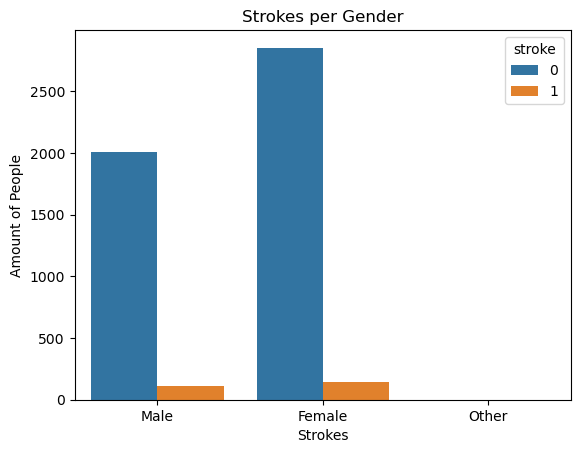

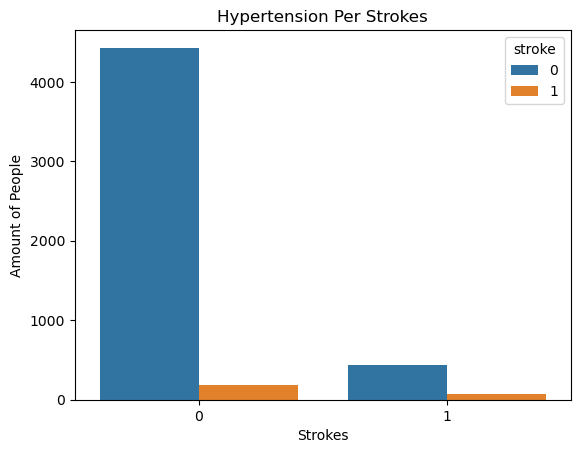

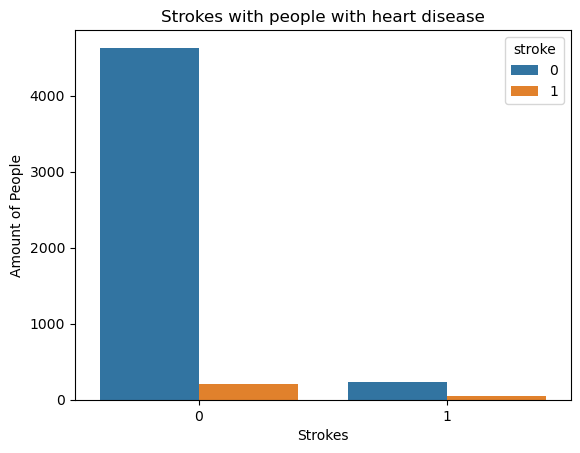

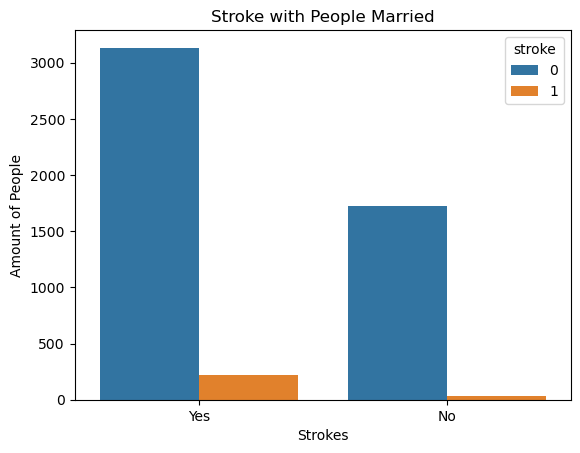

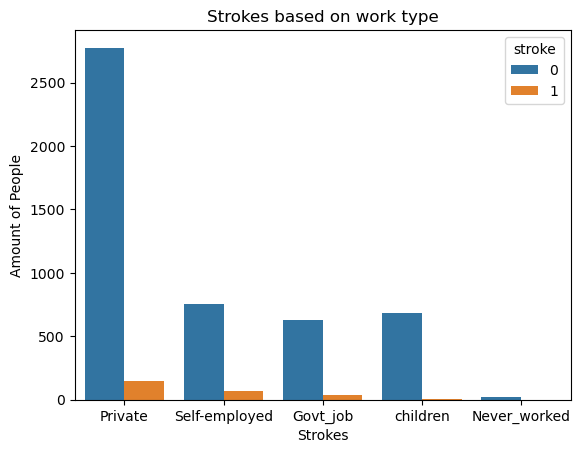

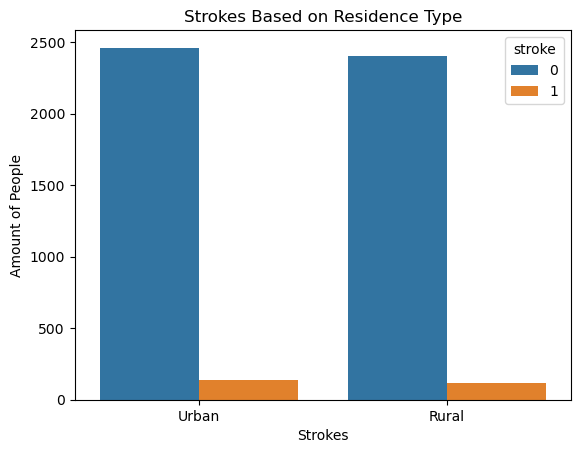

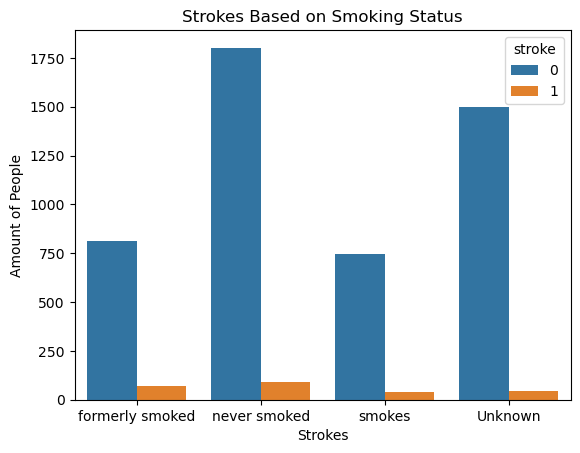

In [14]:
# Your code here
sns.countplot(data = df, x = 'gender',hue = 'stroke')
plt.title("Strokes per Gender")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'hypertension',hue = 'stroke')
plt.title("Hypertension Per Strokes")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'heart_disease',hue = 'stroke')
plt.title("Strokes with people with heart disease")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'ever_married',hue = 'stroke')
plt.title("Stroke with People Married")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'work_type',hue = 'stroke')
plt.title("Strokes based on work type")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'Residence_type',hue = 'stroke')
plt.title("Strokes Based on Residence Type")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()

sns.countplot(data = df, x = 'smoking_status',hue = 'stroke')
plt.title("Strokes Based on Smoking Status")
plt.xlabel("Strokes")
plt.ylabel("Amount of People")
plt.show()


**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify.**

In [15]:
df_X = df.drop(columns=['stroke','id'])
df_Y = df['stroke'].astype(int)

## YOUR CODE HERE
df_X = pd.get_dummies(df_X,columns = ['gender','ever_married','work_type','Residence_type','smoking_status'], dtype = int)
df_X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [16]:
df_X.columns
df['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

**Your Comments Here**:

We don't need to apply scaling as this model is a decesion trees.

**1.6: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [17]:
## YOUR CODE HERE
X_dev, X_test, y_dev, y_test= train_test_split(df_X, df_Y, test_size = .2, train_size =.8, random_state = 42, stratify = df_Y)


**Your Comments Here**:

In [18]:
# I choose to split it with train data being 80 % and test 20% as this is tradinal standard for spliting
# I choose to use stratify to make sure that target variable had a good number of both outcomes in the data. This is important
# with an imbalanced data set such as the one we are using.

**1.7: Fit a Decision Tree on the training data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**


**HINT : Think about the proportion of the class label**

In [19]:
## YOUR CODE HERE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier()
clf.fit(X_dev, y_dev)
yPrediction = clf.predict(X_test)
mean_squared_error(y_test,yPrediction)
cnfMat = confusion_matrix(yPrediction, y_test)
print(cnfMat)

roc_auc_score(yPrediction, y_test)


[[920  40]
 [ 52  10]]


0.5598118279569894

**Your Comments Here**
My AUC score is .567 showing that my model is having poor results. As their is a great inbalance within the data I am using the AUC-ROC score as its able to handle data with an imbalance in it.

**1.8: Visualize the trained tree until the max_depth 8**

In [20]:
## YOUR CODE HERE
from sklearn.tree import plot_tree
plt.figure(figsize = (100,100))
plot_tree(clf, fontsize = 6, max_depth = 8)
plt.show()

In [21]:
X_dev.columns.tolist()

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance. Carefully consider which metric to use considering the imbalance in the class label.**

In [22]:
## YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier

path = clf.cost_complexity_pruning_path(X_dev, y_dev)
roc_auc_score(yPrediction, y_test)


0.5598118279569894

**Your Comments Here**. 
I wanted to keep the metrics for the prediction the same for easier comparison between the values. AUC score is effective at evaluating models with imbalances within the data

In [23]:
feature_names = X_dev.columns

In [24]:
feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

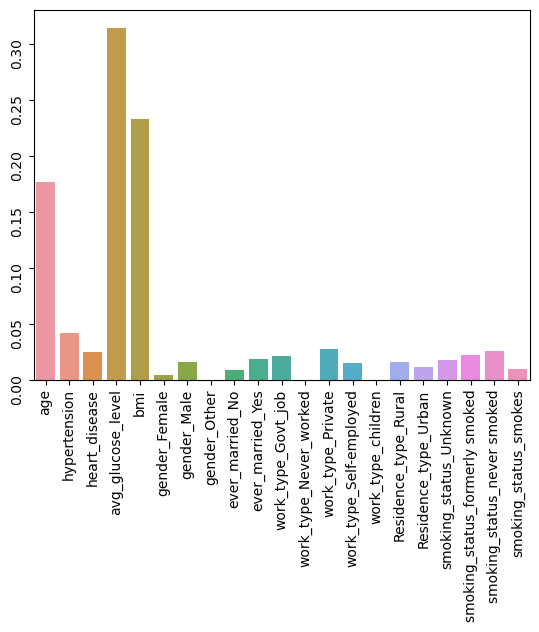

In [25]:
ax = sns.barplot(x = feature_names, y =clf.feature_importances_)
ax.tick_params(rotation = 90)

**Your Comments Here**
As we can see from the graph the 3 most important factors are age, avg_glucose_level and BMI. These 3 features has the highest
feature importance in the model showing their impact on chance of stroke.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [26]:
## YOUR CODE HERE
clfRand = RandomForestClassifier()
clfRand.fit(X_dev, y_dev)
yPrediction = clfRand.predict(X_test)
roc_auc_score(y_test, yPrediction)


0.519485596707819

**Your Comments Here**
My AUC score was higher for my decesion tree meaning it performed better.

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [27]:
# ## YOUR CODE HERE
isPure = True
for tree in clfRand.estimators_:
    nodeLis =  tree.tree_.node_count
    leftList =  tree.tree_.children_left
    rightList =  tree.tree_.children_right
    purityList = tree.tree_.impurity
    for nodeIndex in range(nodeLis):
        if (leftList[nodeIndex] == -1 and rightList[nodeIndex] == -1 and purityList[nodeIndex] != 0):
            isPure = False
if (isPure == False):
    print("There exist non pure leaf in the tree")
else:
    print("Every leaf of this tree is pure")



Every leaf of this tree is pure


**Your Comments Here**
I went through every node of every tree and checked if every leaf was pure. I found that all the leave were pure

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [28]:
## YOUR CODE HERE

# I would chose max depth and n_estimators. I would chose n_estimators as it shows the number of trees that are made
# for the model. I believe altering the n_estimators will have a big impact on the model. It also control the fitting model. 
#I would also select max depth as it control the depth of the longest path from the root node to leaf node.
# This parmeter has a large impact on the fitting of the model.


**Your Comments Here**

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Your Comments Here**
I tried to use a range of values in terms of max_Depth and n_estimators to see the impact of using different values on the model. I tried to incremenment each subsquent value by a similar amount to see how these changes impacted the models performance.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [29]:
## YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()

param_grid ={
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 3, 4, 5, 6, 7]
}
gridTree = GridSearchCV(estimator = classifier, param_grid = param_grid, scoring = 'roc_auc', cv = 5)
gridTree.fit(X_dev, y_dev)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [30]:
print('best parameters are',gridTree.best_params_, 'with the score of ',gridTree.best_score_)

best parameters are {'max_depth': 6, 'n_estimators': 50} with the score of  0.8375135558875918


In [31]:
RFCclassifier = RandomForestClassifier(max_depth = gridTree.best_params_['max_depth'], 
                                       n_estimators = gridTree.best_params_['n_estimators'])
RFCclassifier.fit(X_dev, y_dev)

RandomForestClassifier(max_depth=6, n_estimators=50)

In [32]:
pred = RFCclassifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)


0.8417283950617285

**Your Comments Here**
The performance of this model was greatly improved from the prior model from Q2.1 We can see this by the improved through its much high score.

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

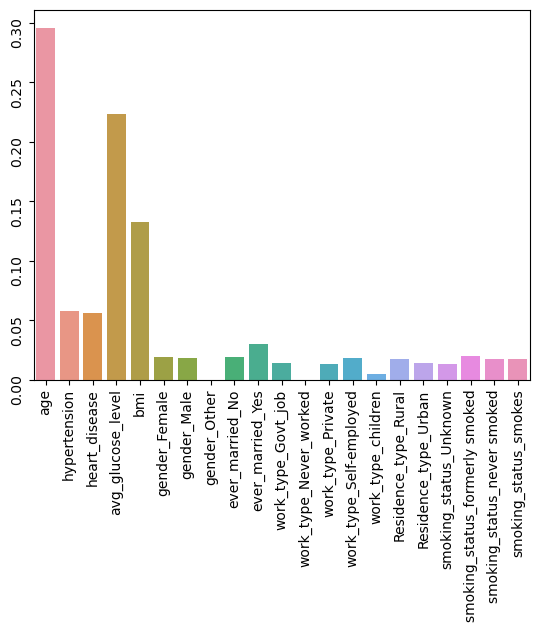

In [33]:
## YOUR CODE HERE
ax = sns.barplot(x = feature_names, y =RFCclassifier.feature_importances_)
ax.tick_params(rotation = 90)

**Your Comments Here**
The three most important factors were age, average glucose level and BMI. The age field has seem to have increased to the top feature while average Glucose level have fallen. I think that age is a large factor in strokes so age being the largest factor makes more sense to me. 

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation.  
You can use GridSearchCV, however make sure to use appropriate metric for the scoring parameter of GridSearchCV.  
Report on the time taken to do model selection for both the models. Also, report the performance of the test
dataset from the optimal models.**

In [34]:
## YOUR CODE HERE
import time
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier()

startTime = time.time()
GBC_grid ={
    'n_estimators': [40, 80],
    'learning_rate': [0.1, 0.01],
    'max_depth': [4, 8]
}
gridGBC = GridSearchCV(estimator = GBCModel, param_grid = GBC_grid, cv = 5, scoring = 'roc_auc')
gridGBC.fit(X_dev, y_dev)
totalTime = time.time() - startTime
predGBC = gridGBC.predict(X_test)


In [35]:
print("Time Taken:", round((totalTime//3600)),"Hours", '|',round((totalTime%3600)//60), "minutes", "|" ,round((totalTime%60),2),"seconds")


Time Taken: 0 Hours | 1 minutes | 45.78 seconds


In [36]:
roc_auc_score(y_test, predGBC)


0.5079423868312758

In [37]:
## YOUR CODE HERE
import time
from sklearn.ensemble import HistGradientBoostingClassifier
HGBCModel = HistGradientBoostingClassifier()

startTime = time.time()
HGBC_grid ={
    'max_iter': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [4, 8]
}
gridHGBC = GridSearchCV(estimator = HGBCModel, param_grid = HGBC_grid, cv = 5, scoring = 'roc_auc')
gridHGBC.fit(X_dev, y_dev)
totalTime = time.time() - startTime
predHGBC = gridHGBC.predict(X_test)


In [38]:
print("Time Taken:", round((totalTime//3600)),"Hours", '|',round((totalTime%3600)//60), "minutes", "|" ,round((totalTime%60),2),"seconds")


Time Taken: 0 Hours | 0 minutes | 58.12 seconds


In [39]:
roc_auc_score(y_test, predHGBC)


0.5

**Your Comments Here** :
The GradientBoostingClassifier was my best performing model and had the higher score

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [40]:
## YOUR CODE HERE
import time
import datetime
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
XGBModel = xgb.XGBClassifier()

startTime = time.time()
param_grid ={
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [None, 6]
}
totalTime = time.time() - startTime
gridXGB = GridSearchCV(estimator = XGBModel, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
gridXGB.fit(X_dev, y_dev)
totalTime = time.time() - startTime
predXGB = gridXGB.predict(X_test)



In [41]:
print("Time Taken:", round((totalTime//3600)),"Hours", '|',round((totalTime%3600)//60), "minutes", "|" ,round((totalTime%60),2),"seconds")


Time Taken: 0 Hours | 0 minutes | 29.14 seconds


In [42]:
roc_auc_score(y_test, predXGB)


0.5

In [43]:
bestTreeCGB= gridXGB.best_params_
bestTreeCGB
featVal = gridXGB.best_estimator_.feature_importances_

In [44]:
bestGrid = gridXGB.best_estimator_

My accuracy was higher for the xgboost model than the GradientBoostingClassifier or the HistGradientBoostingClassifier. 
Also my xgboost model was faster than the other models.

**3.3: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

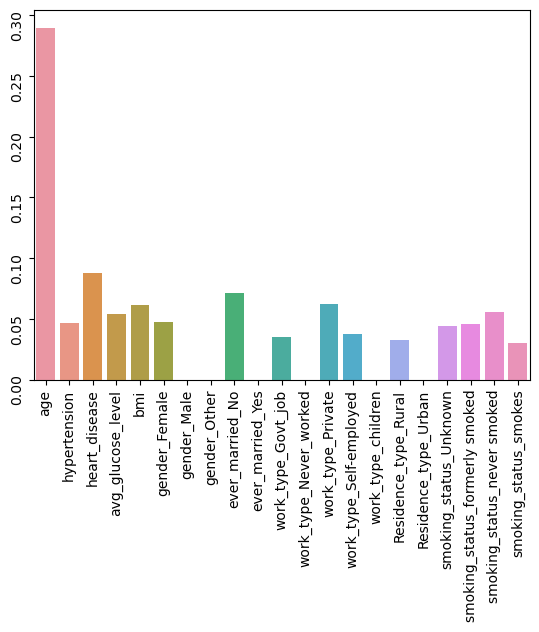

In [45]:
## YOUR CODE HERE
ax = sns.barplot(x = feature_names, y = featVal)
ax.tick_params(rotation = 90)

In [46]:
featList = []
for i in range(len(feature_names)):
    featList.append([feature_names[i], featVal[i]])
featureImportDF= pd.DataFrame(featList, columns = ['Parameters','Values'])
featureImportDF = featureImportDF.sort_values(by='Values', ascending = False).reset_index(drop = True)
featureImportDF[:3]

,Parameters,Values
0,age,0.289827
1,heart_disease,0.087313
2,ever_married_No,0.071021


In [47]:
print('best parameters are',gridTree.best_params_, 'with the score of ',gridTree.best_score_)

best parameters are {'max_depth': 6, 'n_estimators': 50} with the score of  0.8375135558875918


**Your Comments Here**
The top 3 features are age, heart disease ever_married_No. Besides age these two factors were not major indicators in prior models. 

**Your Comments Here**
The XGBoost graph I trust the least as its results are the least simialar to the other models with average glucose level and heart disease being far lower. Therefore I trust its results the least. Both the XGBoost graph and the random forest tree
graph show that the strongest correlation with strokes is age. Since its results are shown in many way in the other graphs I think that the random forest tree is the best model

**3.4: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

**Your Comments Here**
The top 7 features are age, heart_disease, smoking_status_smokes_never smoked, ever_married_No, bmi, avg_glucose_level, work_type_Private and ever_married_No


In [48]:
featureImportDF[:7]

,Parameters,Values
0,age,0.289827
1,heart_disease,0.087313
2,ever_married_No,0.071021
3,work_type_Private,0.062557
4,bmi,0.061523
5,smoking_status_never smoked,0.055249
6,avg_glucose_level,0.054335


In [49]:
 X_dev[['age','heart_disease','ever_married_No','work_type_Private','bmi','smoking_status_never smoked','avg_glucose_level']]

,age,heart_disease,ever_married_No,work_type_Private,bmi,smoking_status_never smoked,avg_glucose_level
845,48.0,0,0,1,33.1,1,69.21
3744,15.0,0,1,1,21.0,1,122.25
4183,67.0,0,0,0,24.9,1,110.42
3409,44.0,0,0,1,24.8,0,65.41
284,14.0,0,1,0,31.6,0,82.34
...,...,...,...,...,...,...,...
1434,45.0,0,0,1,35.1,0,92.86
461,16.0,0,1,0,19.5,0,113.47
1052,61.0,0,0,1,36.2,0,78.65
1757,31.0,0,0,1,26.0,0,74.05


In [50]:
top7_X_Dev = X_dev[['age','heart_disease','ever_married_No','work_type_Private','bmi','smoking_status_never smoked','avg_glucose_level']]
top7_X_Test = X_test[['age','heart_disease','ever_married_No','work_type_Private','bmi','smoking_status_never smoked','avg_glucose_level']]

In [51]:
## YOUR CODE HERE
import time
import datetime
import xgboost as xgb
XGBModel = xgb.XGBClassifier()

startTime = time.time()
param_grid ={
    'n_estimators': [60, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [None, 6]
}
totalTime = time.time() - startTime
gridXGB = GridSearchCV(estimator = XGBModel, param_grid = param_grid, cv = 5, scoring = 'roc_auc')
gridXGB.fit(top7_X_Dev, y_dev)
totalTime = time.time() - startTime
predXGB = gridXGB.predict(top7_X_Test)



In [52]:
print("Time Taken:", round((totalTime//3600)),"Hours", '|',round((totalTime%3600)//60), "minutes", "|" ,round((totalTime%60),2),"seconds")


Time Taken: 0 Hours | 0 minutes | 6.55 seconds


In [53]:
roc_auc_score(y_test, predXGB)

0.49897119341563784

**Your comments here**
The AUC score is lower showing that this new model is worse than the old one. This is possibly because removing the data removed important factor for the model's fitting

**3.5: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

**Your Comments Here**
The area under the curve score was lowest for XGBoost showing that its the worst model. The GradientBoostingClassifier performed the best showing that it is the best model. 


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [54]:
## YOUR CODE HERE
import time
import datetime
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

predXGB = bestGrid.predict_proba(X_test)


In [55]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, predXGB[:,1])


0.042727211611937876

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods. Report brier score after calibration.**

In [56]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV

isotonic = CalibratedClassifierCV(bestGrid, method = 'isotonic',cv = 'prefit')
isotonic.fit(X_dev, y_dev)
isotPred = isotonic.predict_proba(X_test)[:, 1]


In [57]:
plattModel = CalibratedClassifierCV(bestGrid, method = 'sigmoid',cv = 'prefit')
plattModel.fit(X_dev, y_dev)
plattPred = plattModel.predict_proba(X_test)[:, 1]

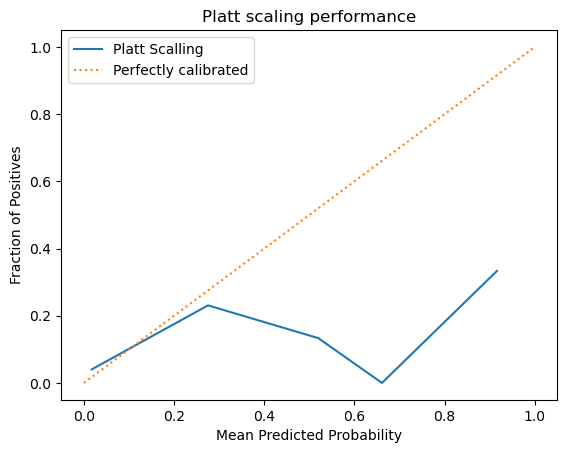

In [58]:
from sklearn.calibration import calibration_curve
fracPos, meanVals = calibration_curve(y_test, plattPred)
plt.plot(meanVals, fracPos, label = 'Platt Scalling')
plt.plot([0,1], [0,1], linestyle =':', label ="Perfectly calibrated")
plt.title("Platt scaling performance")
plt.ylabel("Fraction of Positives")
plt.xlabel("Mean Predicted Probability")
plt.legend()
plt.show()

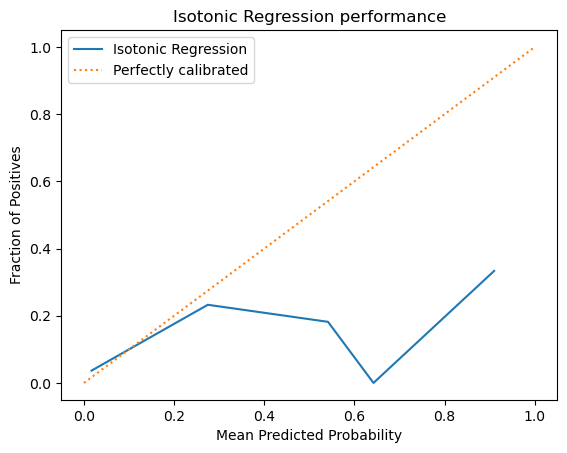

In [59]:
fracPos, meanVals = calibration_curve(y_test, isotPred)
plt.plot(meanVals, fracPos, label = 'Isotonic Regression')
plt.plot([0,1], [0,1], linestyle =':', label ="Perfectly calibrated")
plt.title("Isotonic Regression performance")
plt.ylabel("Fraction of Positives")
plt.xlabel("Mean Predicted Probability")
plt.legend()
plt.show()

In [61]:
print('Isotonic scaling',brier_score_loss(y_test, plattPred))
print('Platt scaling', brier_score_loss(y_test, isotPred))

Isotonic scaling 0.05080431906196542
Platt scaling 0.04904086161140513


**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [60]:
print('Isotonic scaling',brier_score_loss(y_test, plattPred))
print('Platt scaling', brier_score_loss(y_test, isotPred))

Isotonic scaling 0.05080431906196542
Platt scaling 0.04904086161140513


As both of the brieir score went up it means the calibration hurt the model performance 